Using downloaded and verified file: C:\Users\kavit\.medmnist\chestmnist.npz


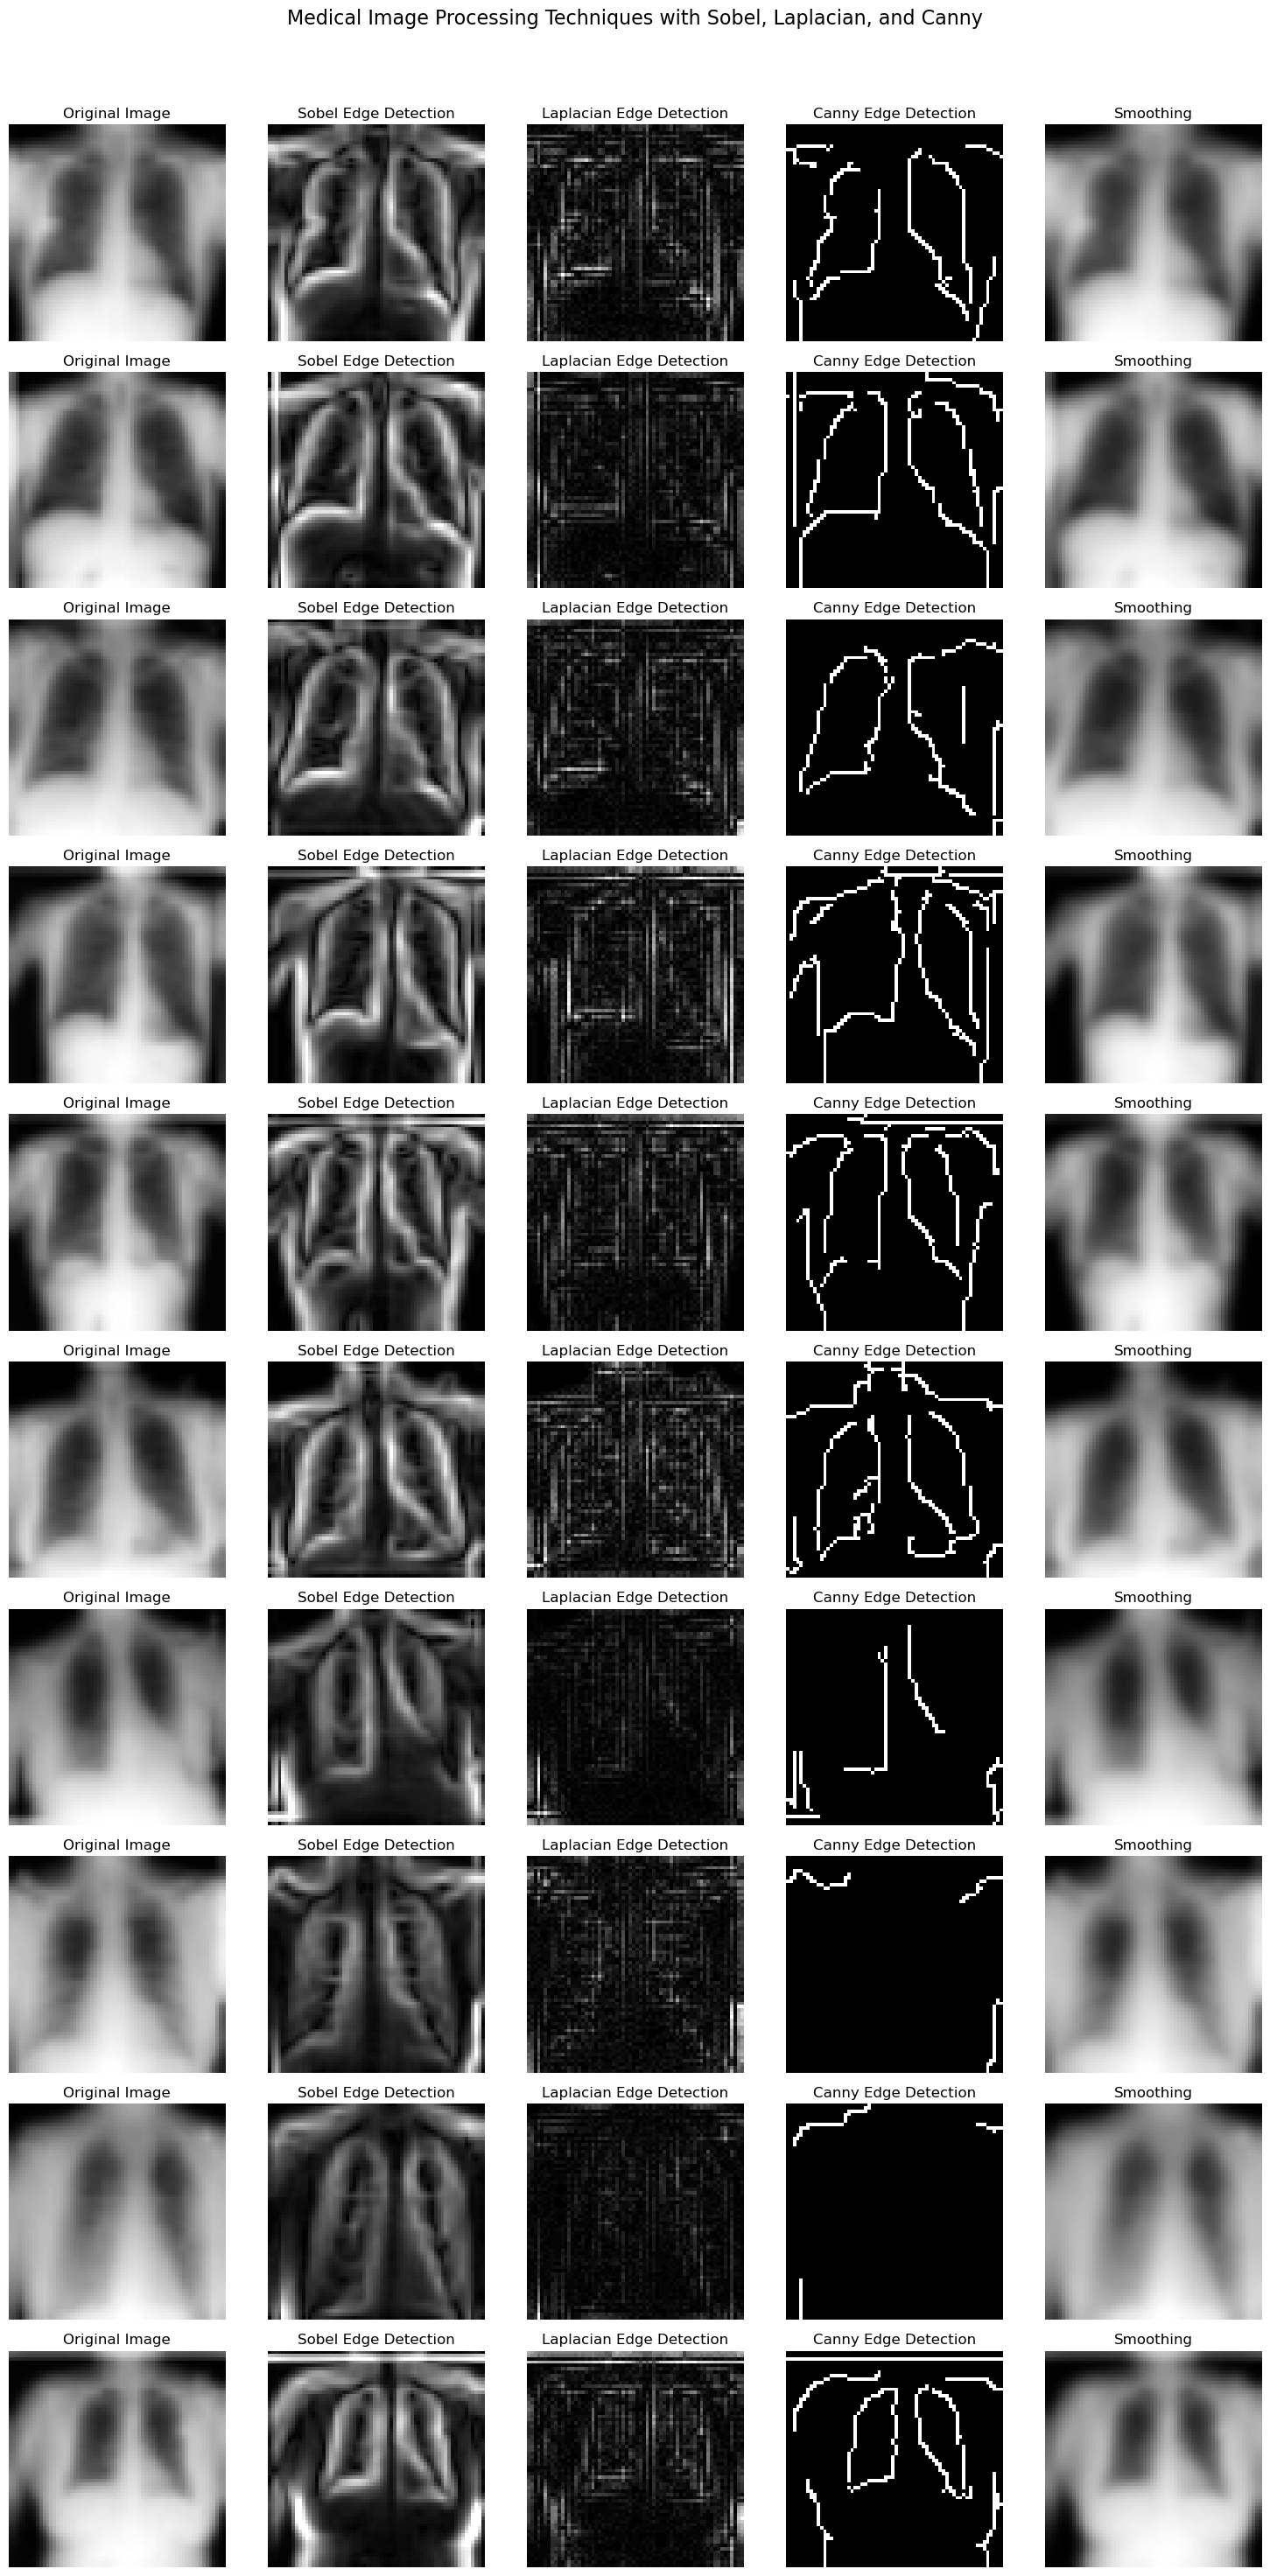

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import ChestMNIST
import torchvision.transforms as transforms

# Load a small dataset of chest X-ray images
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64 pixels
    transforms.ToTensor()  # Convert to tensor format for processing
])

# Download and load a subset of the ChestMNIST dataset 
data = ChestMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].squeeze().numpy(), data[i][1]) for i in range(10)])

def process_image(image):
    image = (image * 255).astype(np.uint8)
    
    # Edge Detection using Sobel filter
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3) 
    sobel_combined = cv2.magnitude(sobel_x, sobel_y) 
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    
    # Edge Detection using Laplacian filter
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)  
    
    # Edge Detection using Canny filter
    canny = cv2.Canny(image, 100, 200)
    
    # Smoothing with Gaussian Blur
    smoothed = cv2.GaussianBlur(image, (5, 5), sigmaX=0)
    
    return sobel_combined, laplacian, canny, smoothed

# Display original and processed images for comparison
fig, axes = plt.subplots(10, 5, figsize=(15, 30))
fig.suptitle('Medical Image Processing Techniques with Sobel, Laplacian, and Canny', fontsize=16)

for i, img in enumerate(images):
    sobel, laplacian, canny, smoothed = process_image(img)

    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(sobel, cmap='gray')
    axes[i, 1].set_title("Sobel Edge Detection")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(laplacian, cmap='gray')
    axes[i, 2].set_title("Laplacian Edge Detection")
    axes[i, 2].axis('off')

    axes[i, 3].imshow(canny, cmap='gray')
    axes[i, 3].set_title("Canny Edge Detection")
    axes[i, 3].axis('off')

    axes[i, 4].imshow(smoothed, cmap='gray')
    axes[i, 4].set_title("Smoothing")
    axes[i, 4].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Using downloaded and verified file: C:\Users\kavit\.medmnist\retinamnist.npz


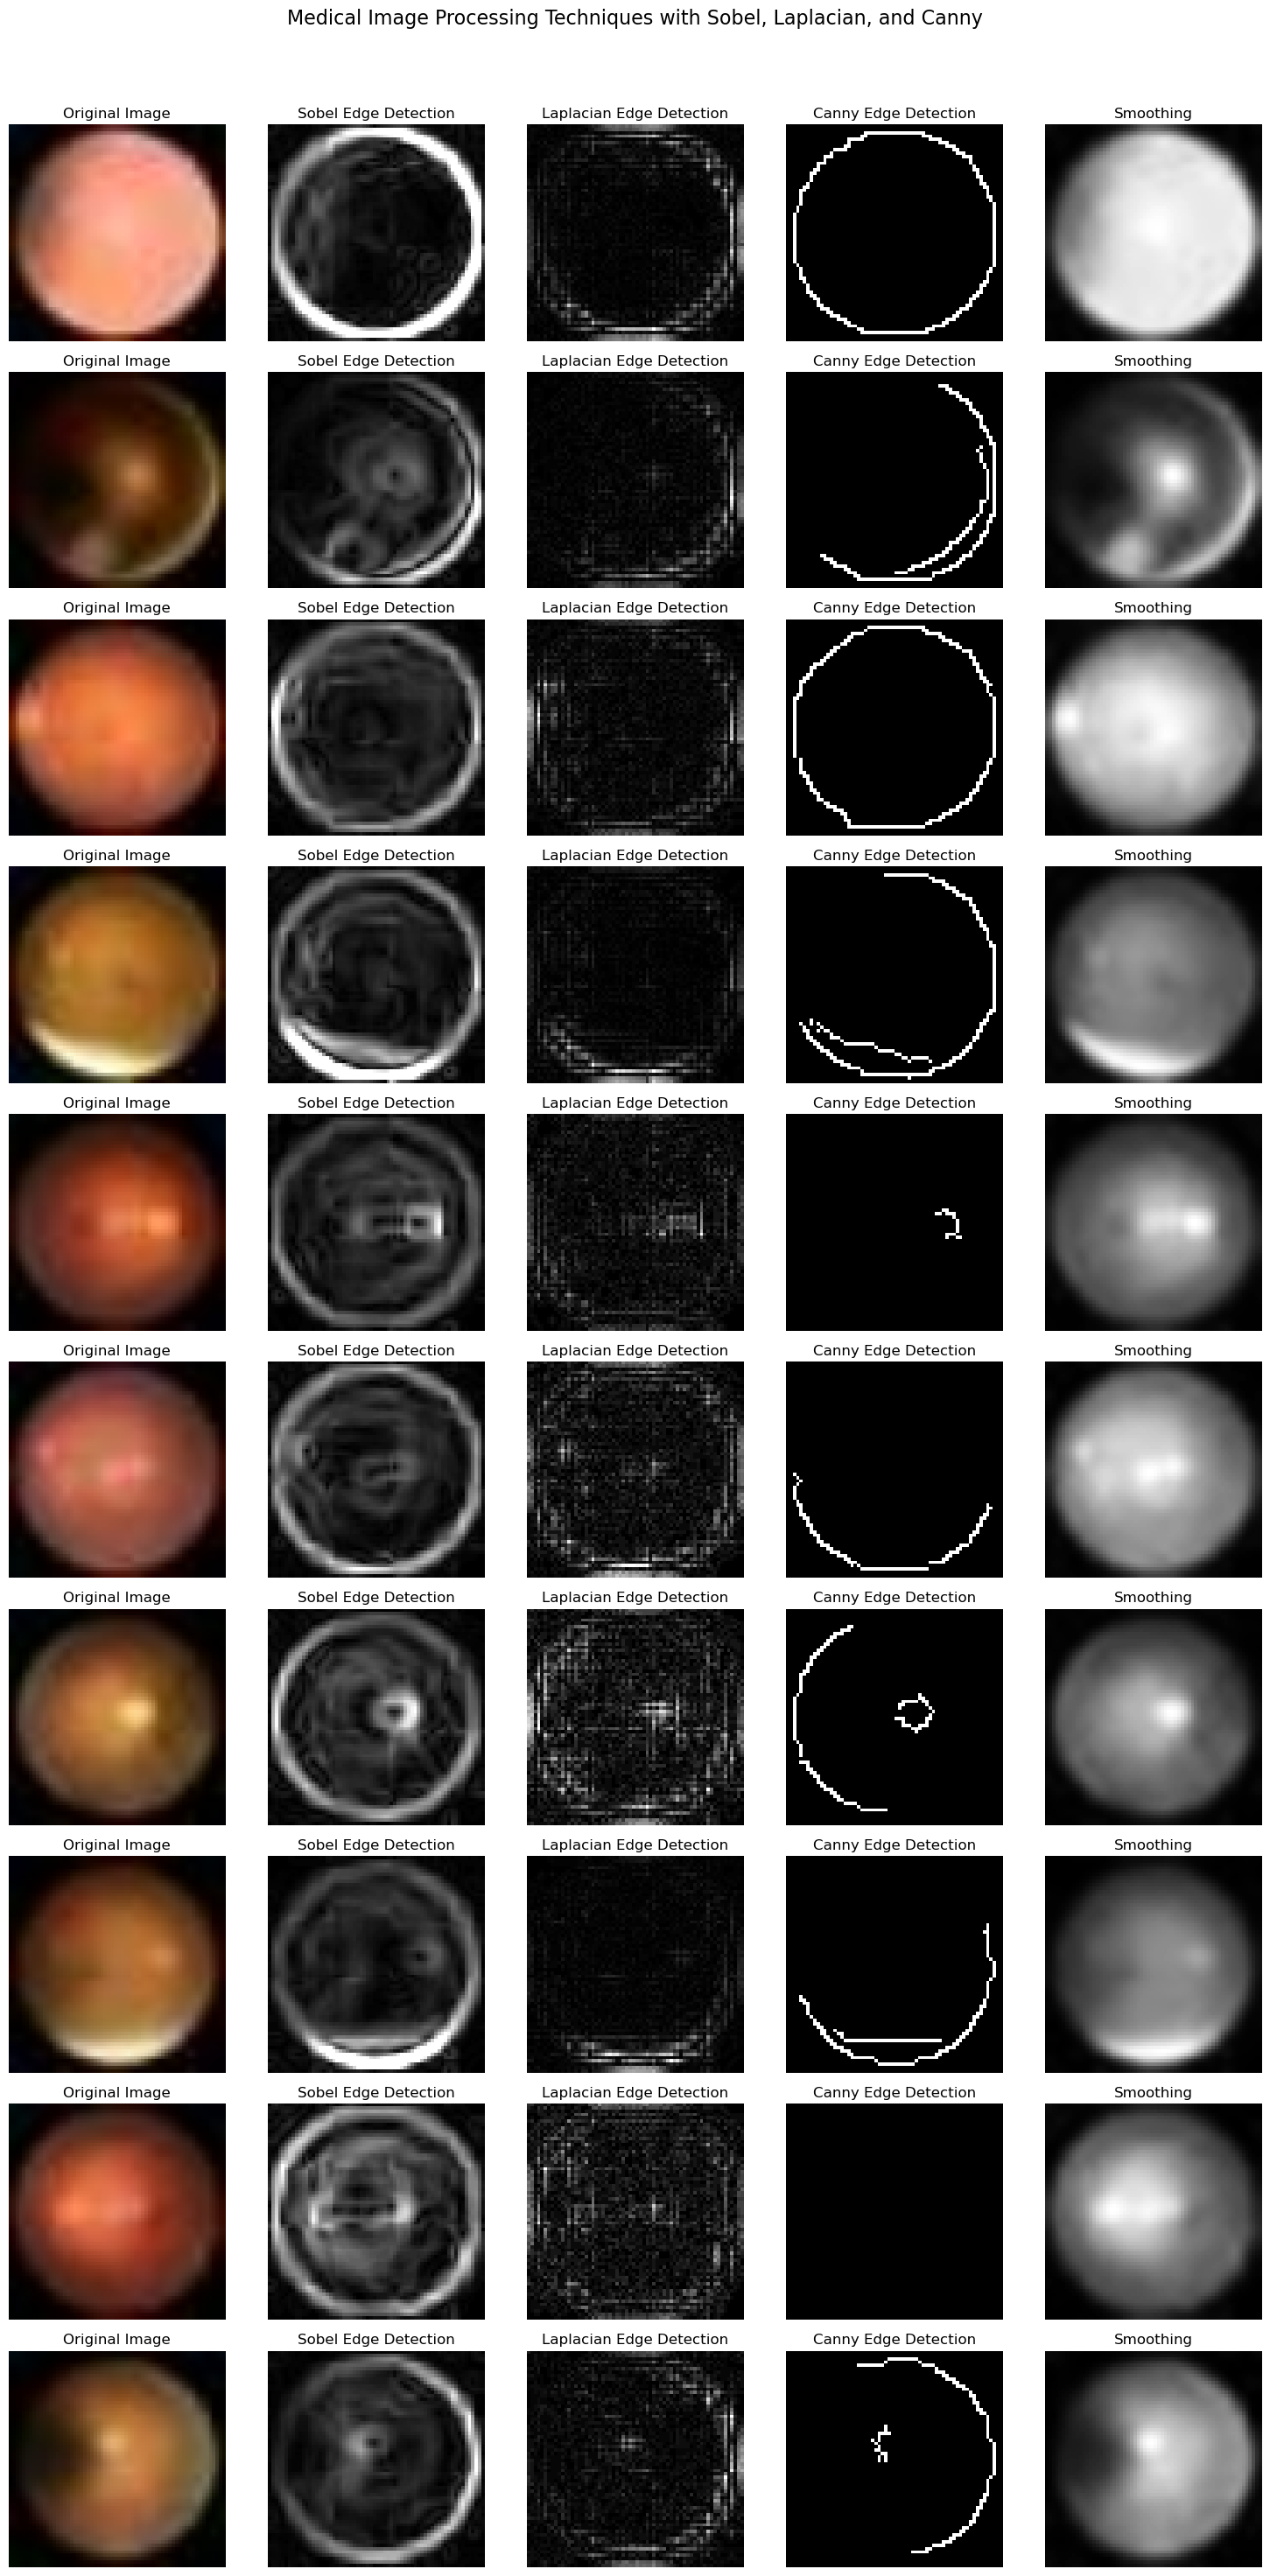

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import RetinaMNIST
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor()  
])

# Download and load a subset of the PathMNIST dataset 
data = RetinaMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].squeeze().numpy(), data[i][1]) for i in range(10)])

def process_image(image):
    image = (image * 255).astype(np.uint8)
    image = np.transpose(image, (1, 2, 0))  
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian) 
    
    canny = cv2.Canny(gray_image, 100, 200)
    
    smoothed = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=0)
    
    return sobel_combined, laplacian, canny, smoothed

fig, axes = plt.subplots(10, 5, figsize=(15, 30))
fig.suptitle('Medical Image Processing Techniques with Sobel, Laplacian, and Canny', fontsize=16)

for i, img in enumerate(images):
    sobel, laplacian, canny, smoothed = process_image(img)

    axes[i, 0].imshow(img.transpose(1, 2, 0), cmap='gray') 
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(sobel, cmap='gray')
    axes[i, 1].set_title("Sobel Edge Detection")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(laplacian, cmap='gray')
    axes[i, 2].set_title("Laplacian Edge Detection")
    axes[i, 2].axis('off')

    axes[i, 3].imshow(canny, cmap='gray')
    axes[i, 3].set_title("Canny Edge Detection")
    axes[i, 3].axis('off')

    axes[i, 4].imshow(smoothed, cmap='gray')
    axes[i, 4].set_title("Smoothing")
    axes[i, 4].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Using downloaded and verified file: C:\Users\kavit\.medmnist\retinamnist.npz


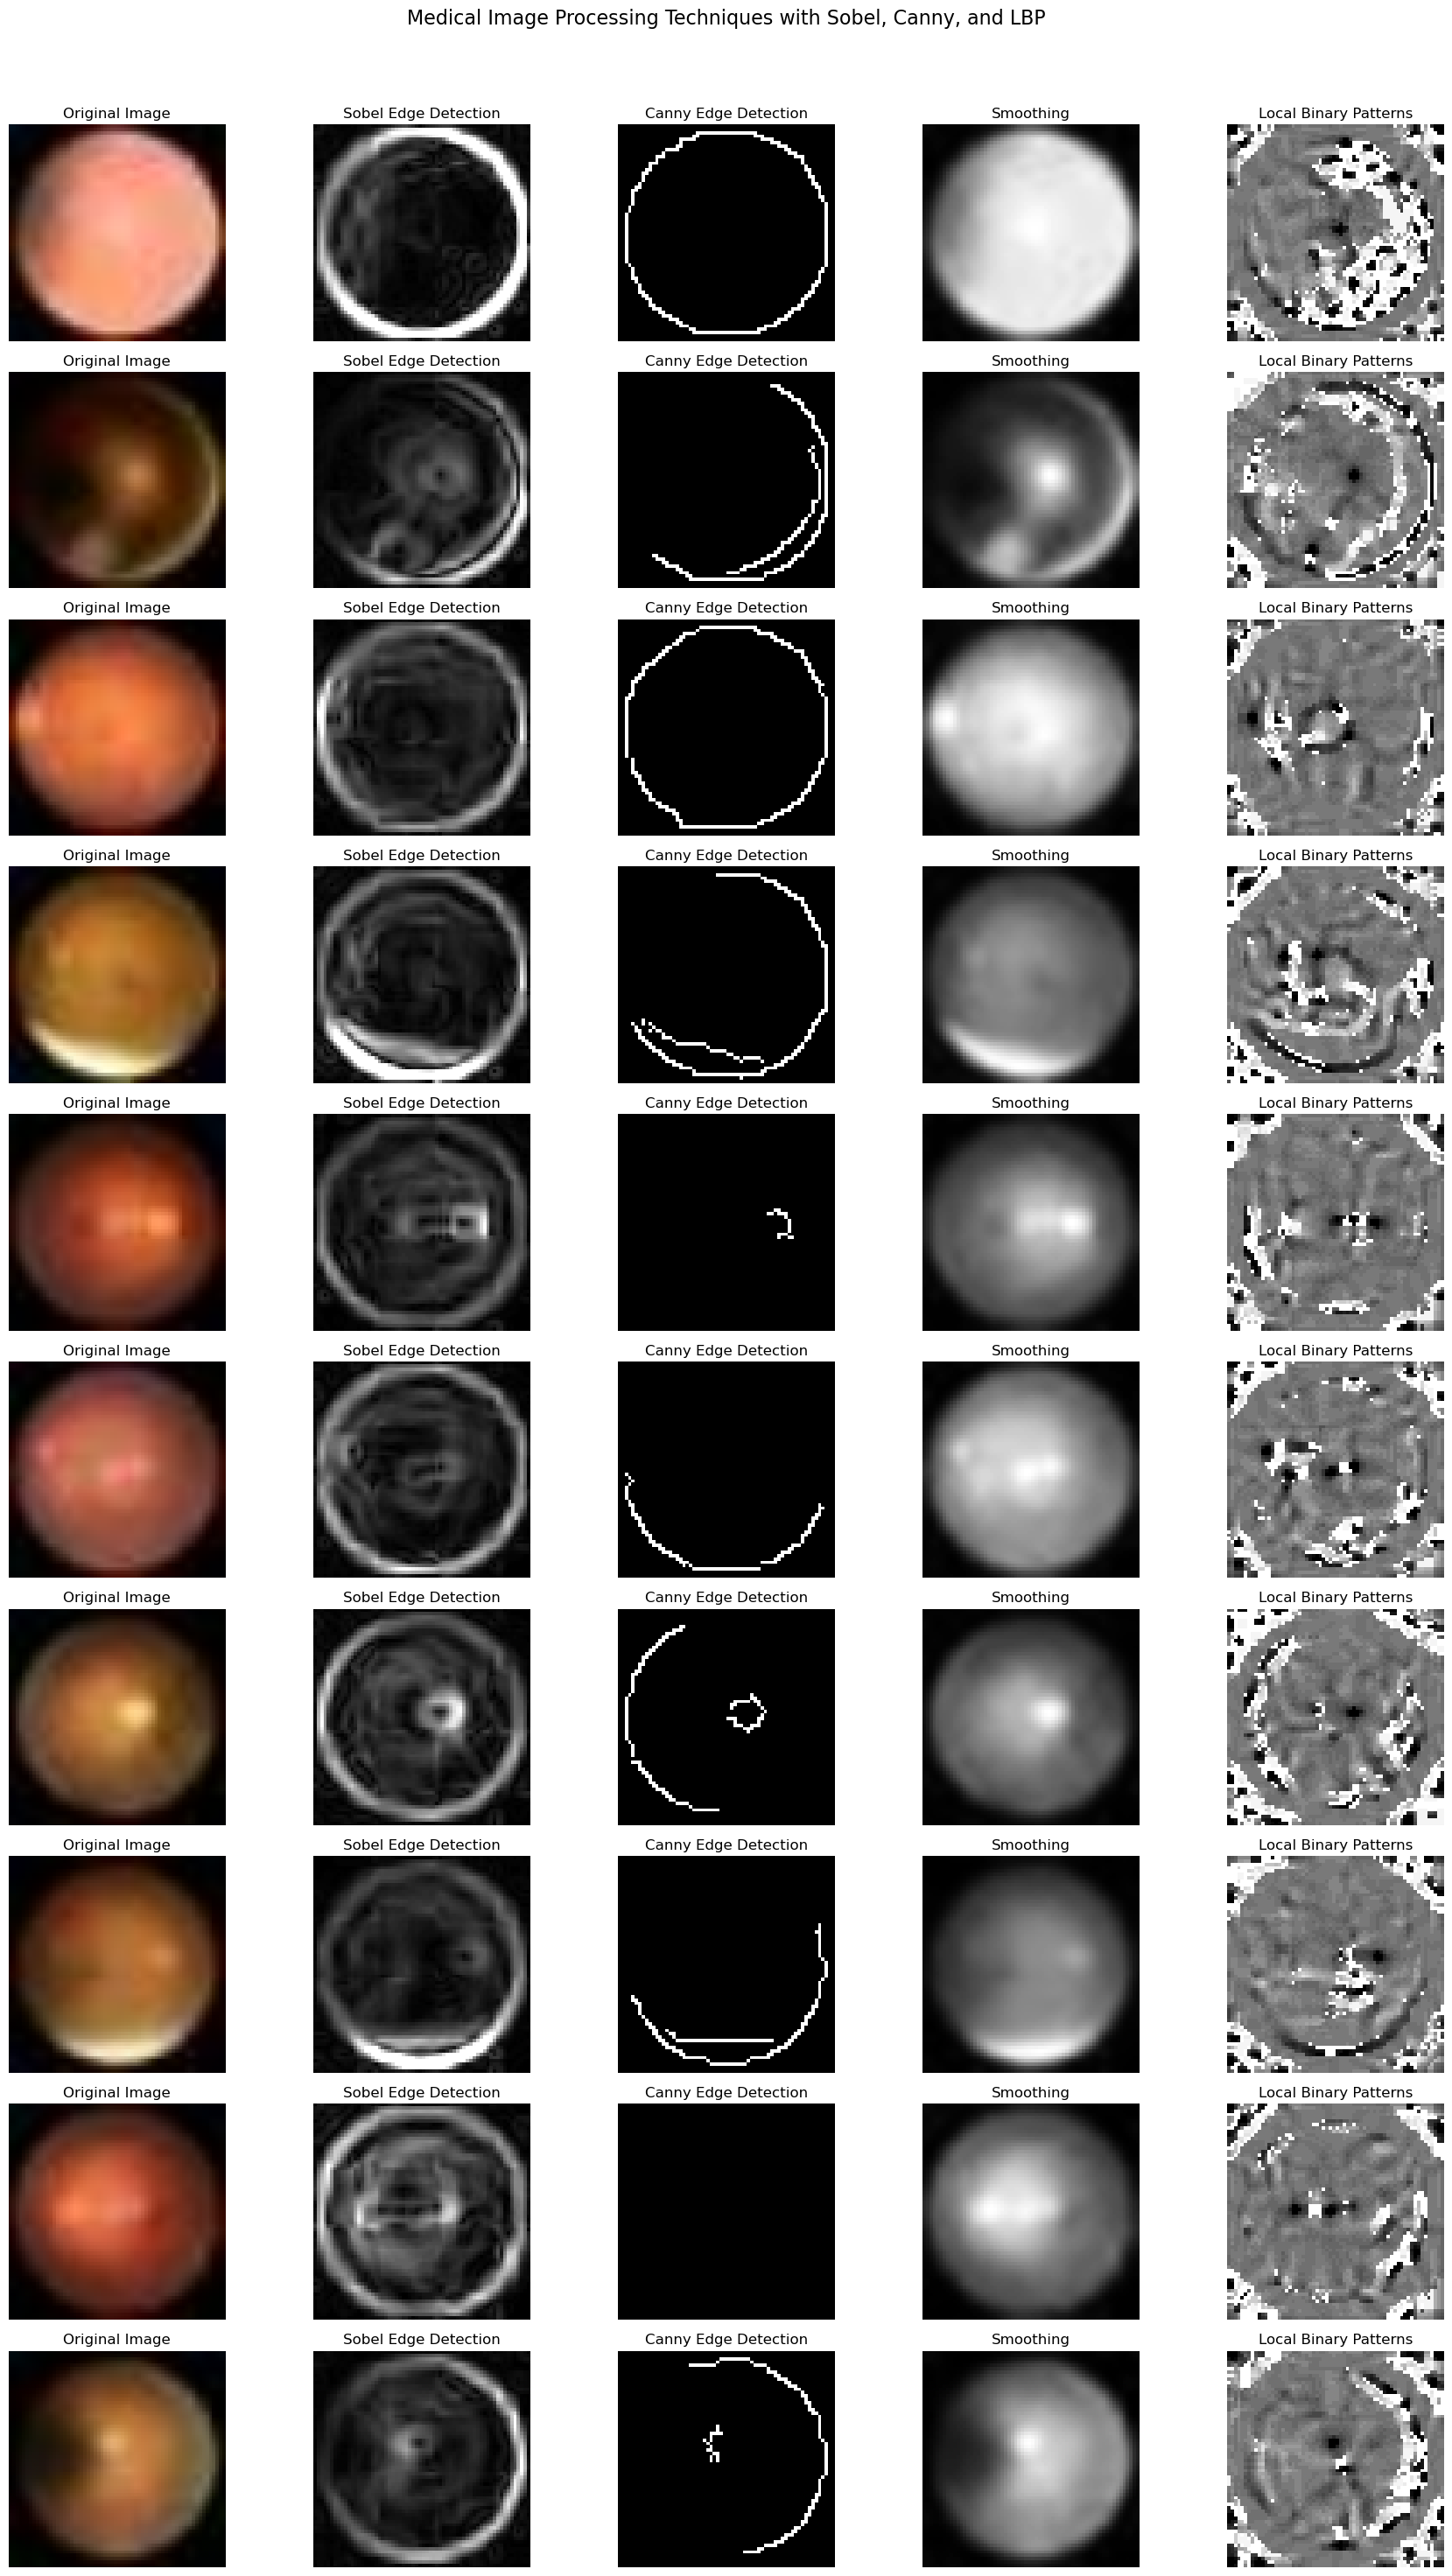

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import RetinaMNIST
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern

transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor()  
])

data = RetinaMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].squeeze().numpy(), data[i][1]) for i in range(10)])


def process_image(image):
    image = (image * 255).astype(np.uint8)
    image = np.transpose(image, (1, 2, 0))  

    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
   
    canny = cv2.Canny(gray_image, 100, 200)

    smoothed = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=0)
    
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    
    return sobel_combined, canny, smoothed, lbp

fig, axes = plt.subplots(10, 5, figsize=(18, 30))
fig.suptitle('Medical Image Processing Techniques with Sobel, Canny, and LBP', fontsize=16)

for i, img in enumerate(images):
    sobel, canny, smoothed, lbp = process_image(img)

    axes[i, 0].imshow(img.transpose(1, 2, 0), cmap='gray') 
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(sobel, cmap='gray')
    axes[i, 1].set_title("Sobel Edge Detection")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(canny, cmap='gray')
    axes[i, 2].set_title("Canny Edge Detection")
    axes[i, 2].axis('off')

    axes[i, 3].imshow(smoothed, cmap='gray')
    axes[i, 3].set_title("Smoothing")
    axes[i, 3].axis('off')

    axes[i, 4].imshow(lbp, cmap='gray')
    axes[i, 4].set_title("Local Binary Patterns")
    axes[i, 4].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Using downloaded and verified file: C:\Users\kavit\.medmnist\chestmnist.npz


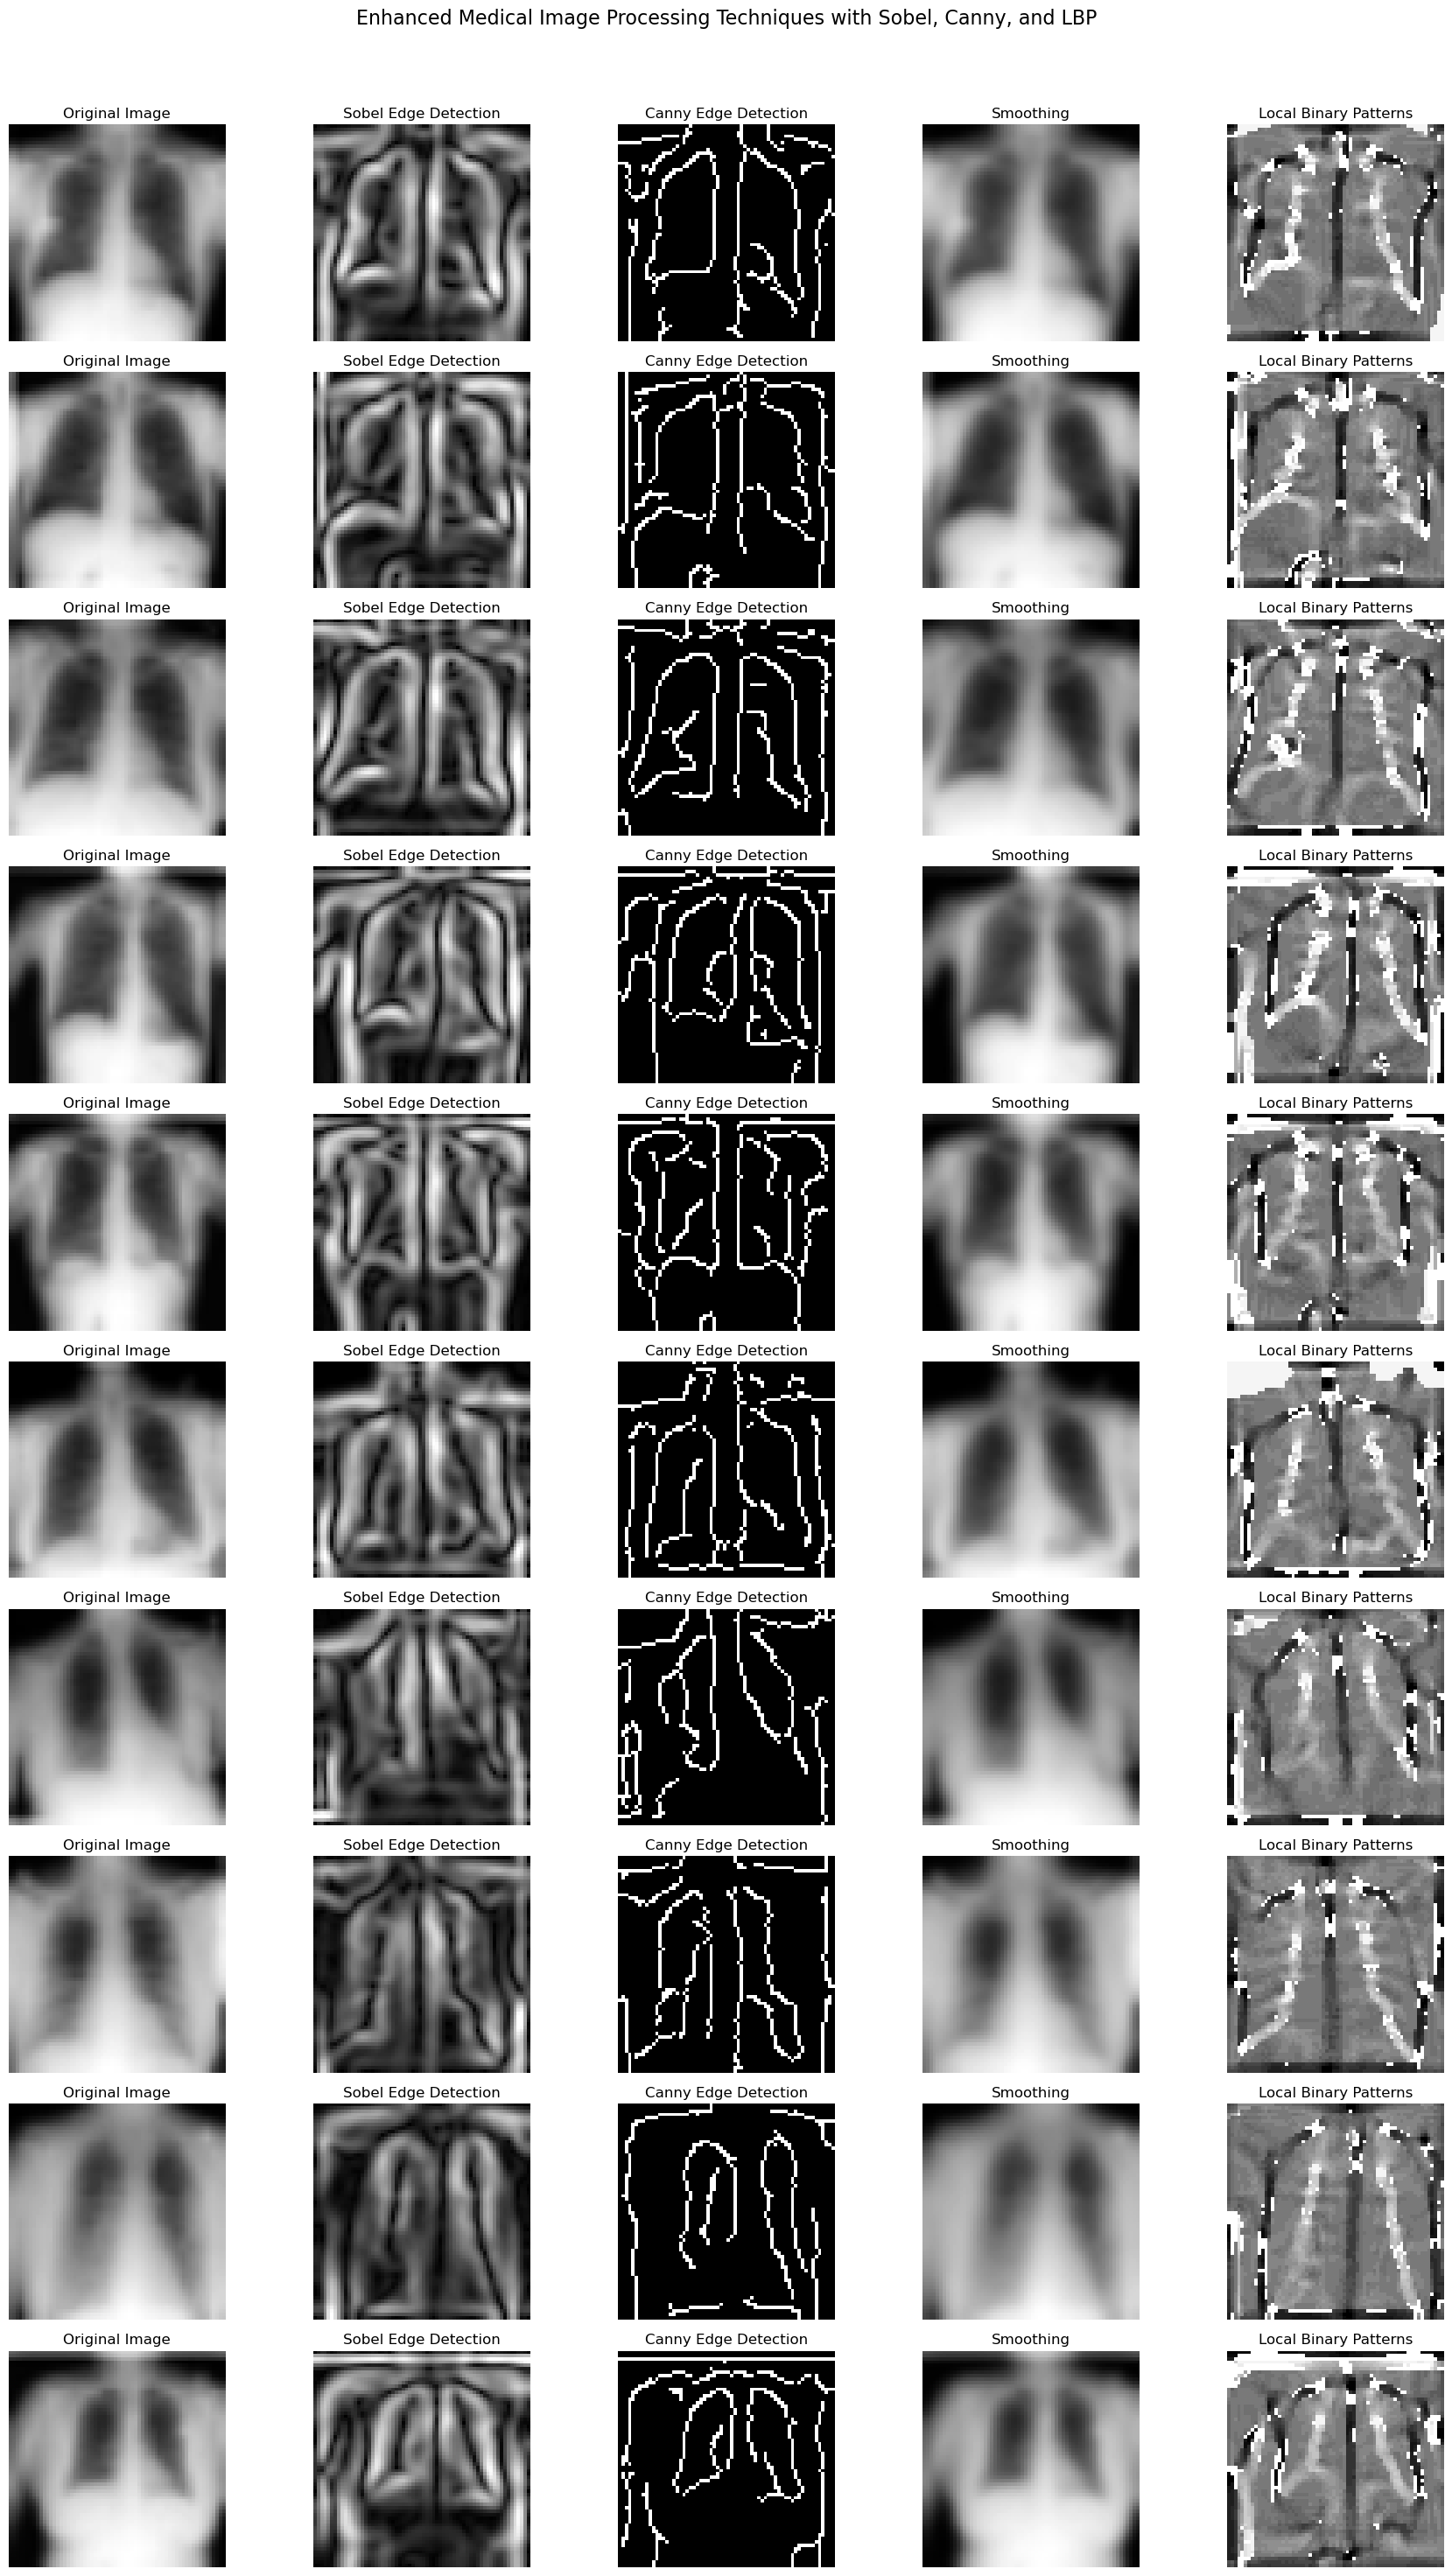

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import ChestMNIST
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

data = ChestMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].squeeze().numpy(), data[i][1]) for i in range(10)])

def process_image(image):
    image = (image * 255).astype(np.uint8)  
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    
    blurred_image = cv2.GaussianBlur(enhanced_image, (7, 7), sigmaX=1.5)
    
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3) 
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    
    canny = cv2.Canny(blurred_image, 50, 150)
    
    smoothed = cv2.GaussianBlur(image, (5, 5), sigmaX=0)
    
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    
    return sobel_combined, canny, smoothed, lbp

fig, axes = plt.subplots(10, 5, figsize=(18, 30))
fig.suptitle('Enhanced Medical Image Processing Techniques with Sobel, Canny, and LBP', fontsize=16)

for i, img in enumerate(images):
    sobel, canny, smoothed, lbp = process_image(img)

    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(sobel, cmap='gray')
    axes[i, 1].set_title("Sobel Edge Detection")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(canny, cmap='gray')
    axes[i, 2].set_title("Canny Edge Detection")
    axes[i, 2].axis('off')

    axes[i, 3].imshow(smoothed, cmap='gray')
    axes[i, 3].set_title("Smoothing")
    axes[i, 3].axis('off')

    axes[i, 4].imshow(lbp, cmap='gray')
    axes[i, 4].set_title("Local Binary Patterns")
    axes[i, 4].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Using downloaded and verified file: C:\Users\kavit\.medmnist\bloodmnist.npz


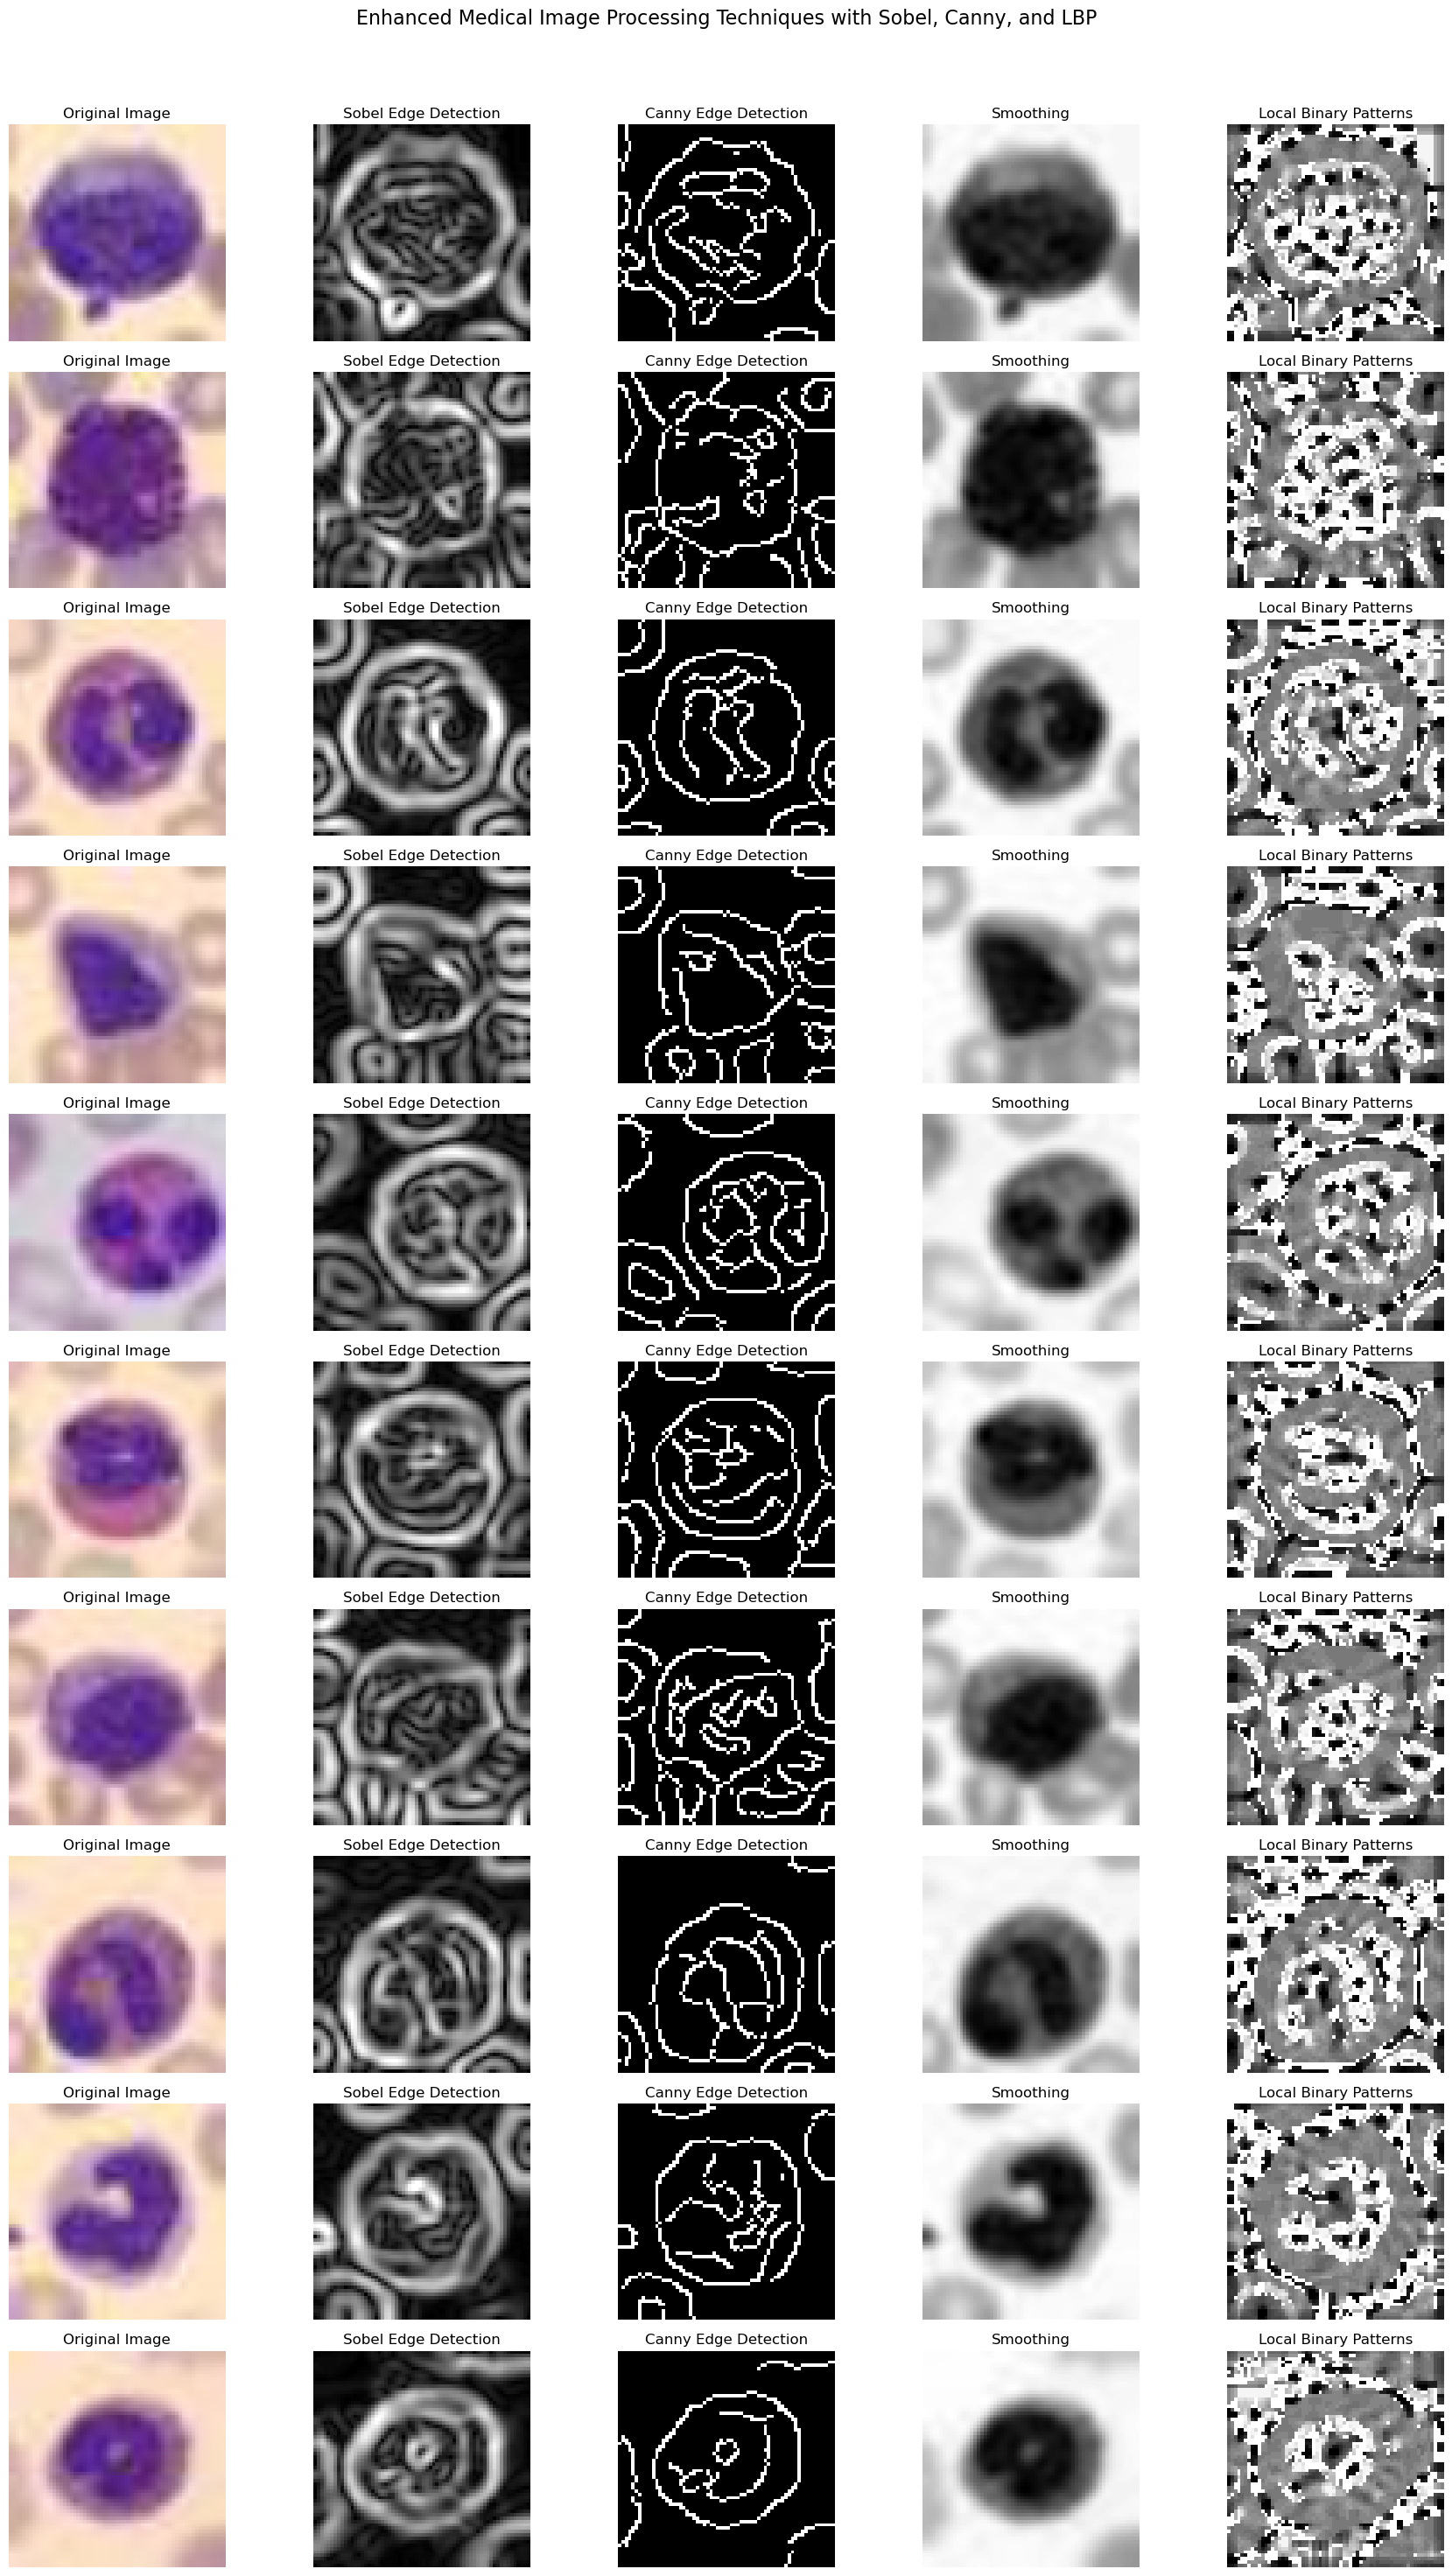

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import BloodMNIST
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern

transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor()  
])

data = BloodMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].squeeze().numpy(), data[i][1]) for i in range(10)])

def process_image(image):
    image = (image * 255).astype(np.uint8)
    image = np.transpose(image, (1, 2, 0))  
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)
 
    blurred_image = cv2.GaussianBlur(enhanced_image, (7, 7), sigmaX=1.5)
    
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)  
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
  
    canny = cv2.Canny(blurred_image, 50, 150)
    smoothed = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=0)
    
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    
    return sobel_combined, canny, smoothed, lbp

fig, axes = plt.subplots(10, 5, figsize=(18, 30))
fig.suptitle('Enhanced Medical Image Processing Techniques with Sobel, Canny, and LBP', fontsize=16)

for i, img in enumerate(images):
    sobel, canny, smoothed, lbp = process_image(img)

    axes[i, 0].imshow(img.transpose(1, 2, 0), cmap='gray')  
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(sobel, cmap='gray')
    axes[i, 1].set_title("Sobel Edge Detection")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(canny, cmap='gray')
    axes[i, 2].set_title("Canny Edge Detection")
    axes[i, 2].axis('off')

    axes[i, 3].imshow(smoothed, cmap='gray')
    axes[i, 3].set_title("Smoothing")
    axes[i, 3].axis('off')

    axes[i, 4].imshow(lbp, cmap='gray')
    axes[i, 4].set_title("Local Binary Patterns")
    axes[i, 4].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Using downloaded and verified file: C:\Users\kavit\.medmnist\chestmnist.npz


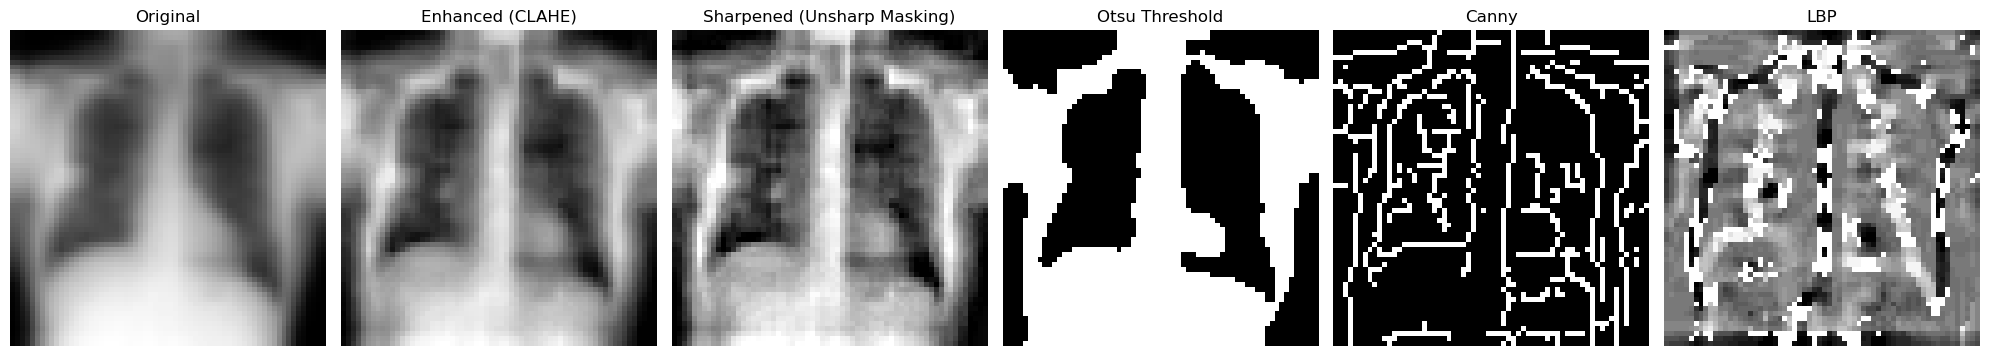

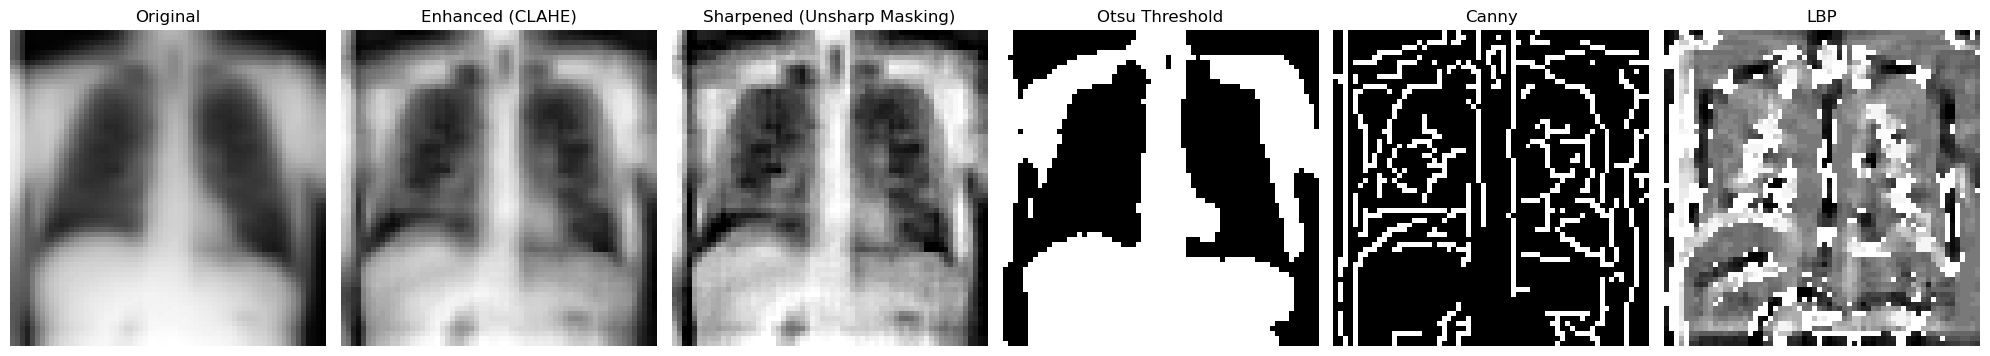

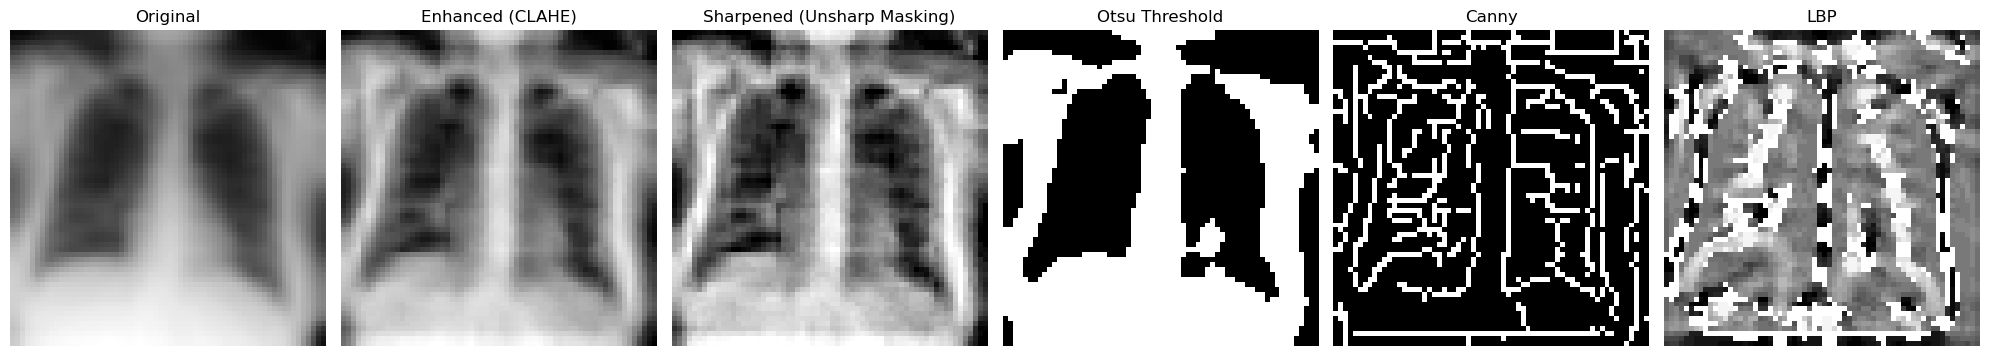

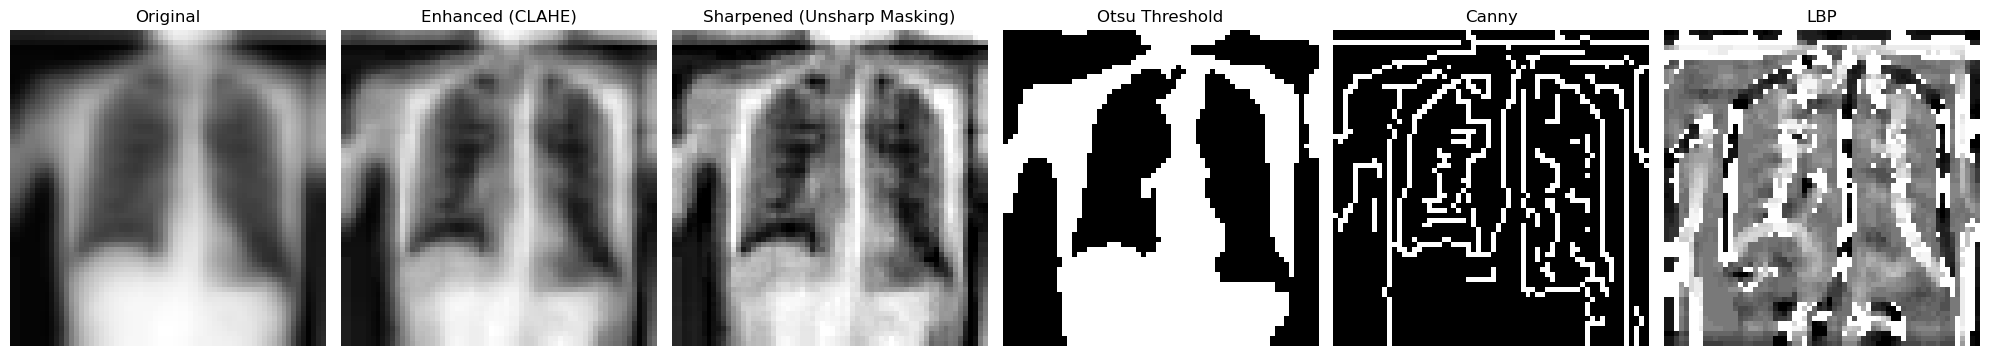

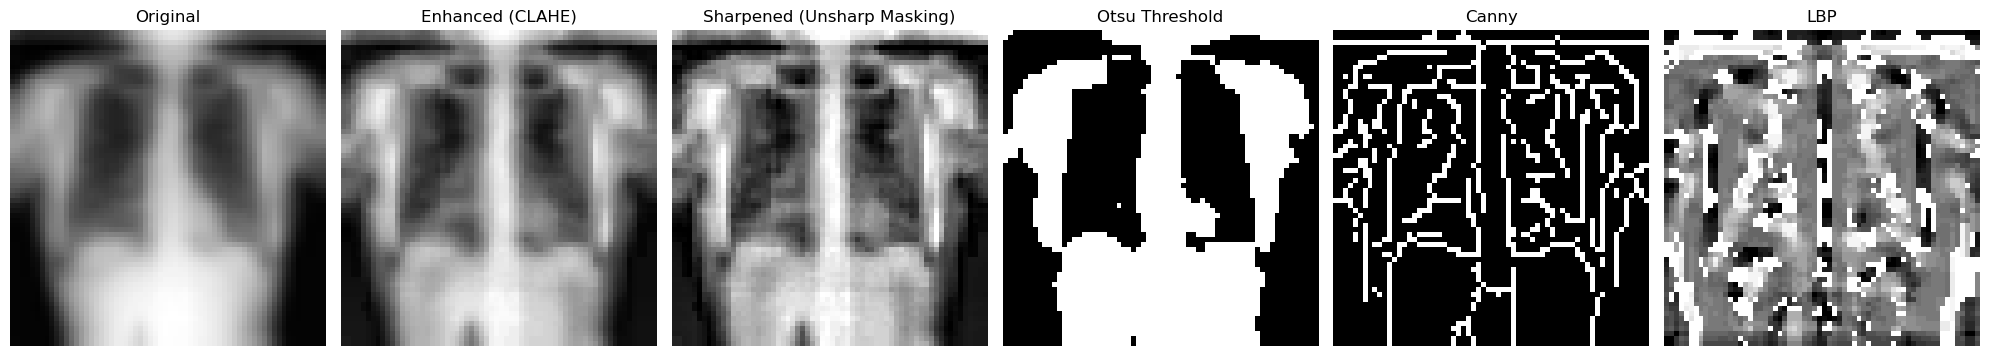

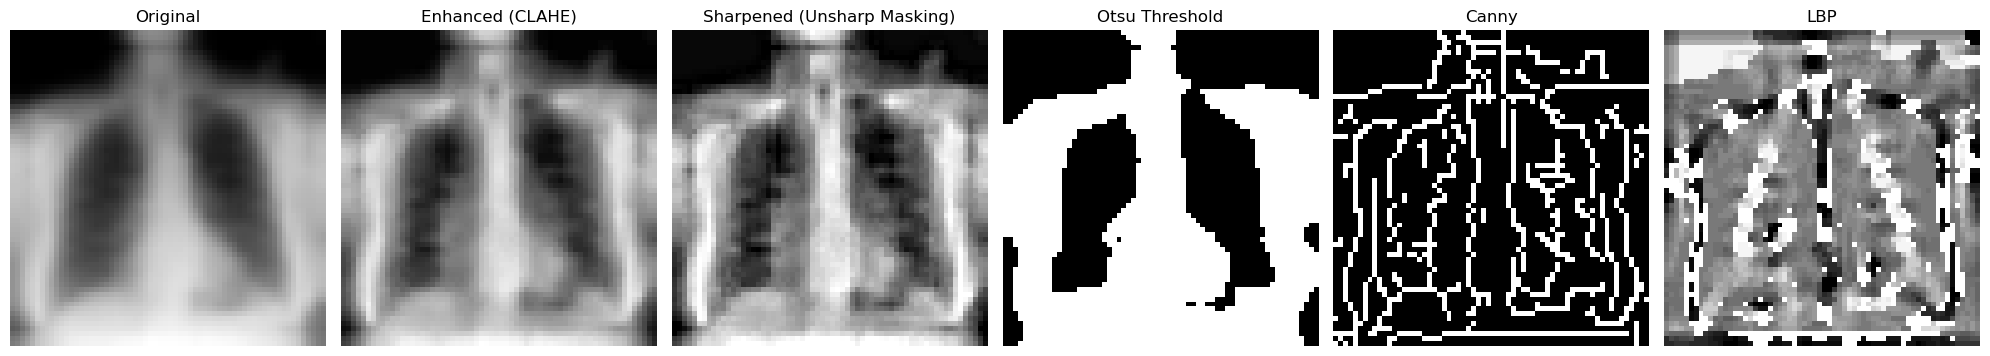

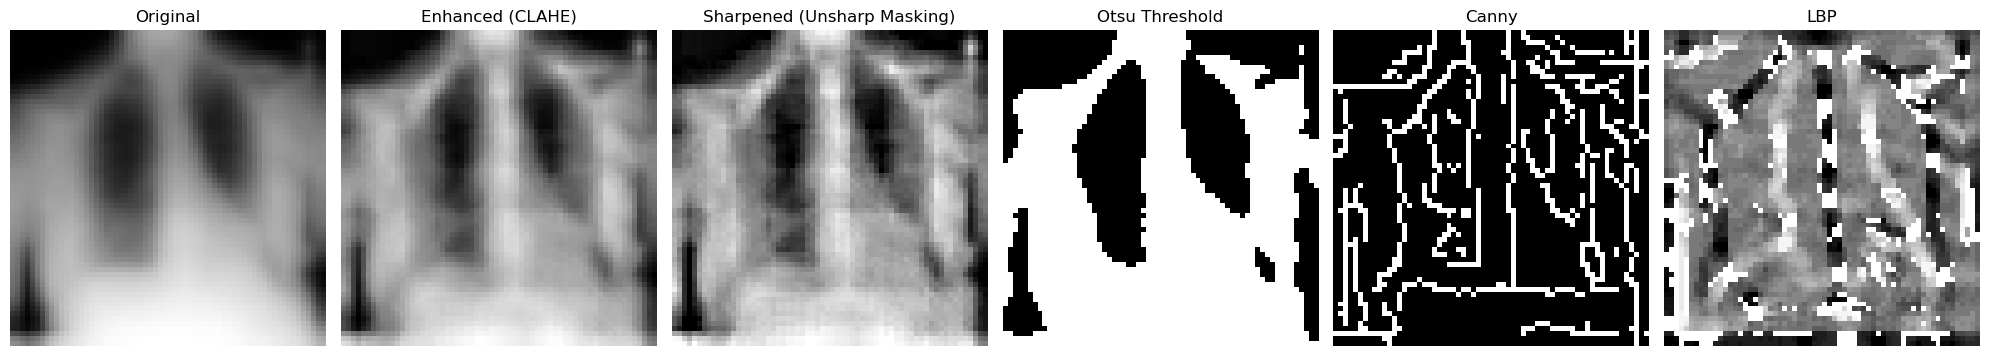

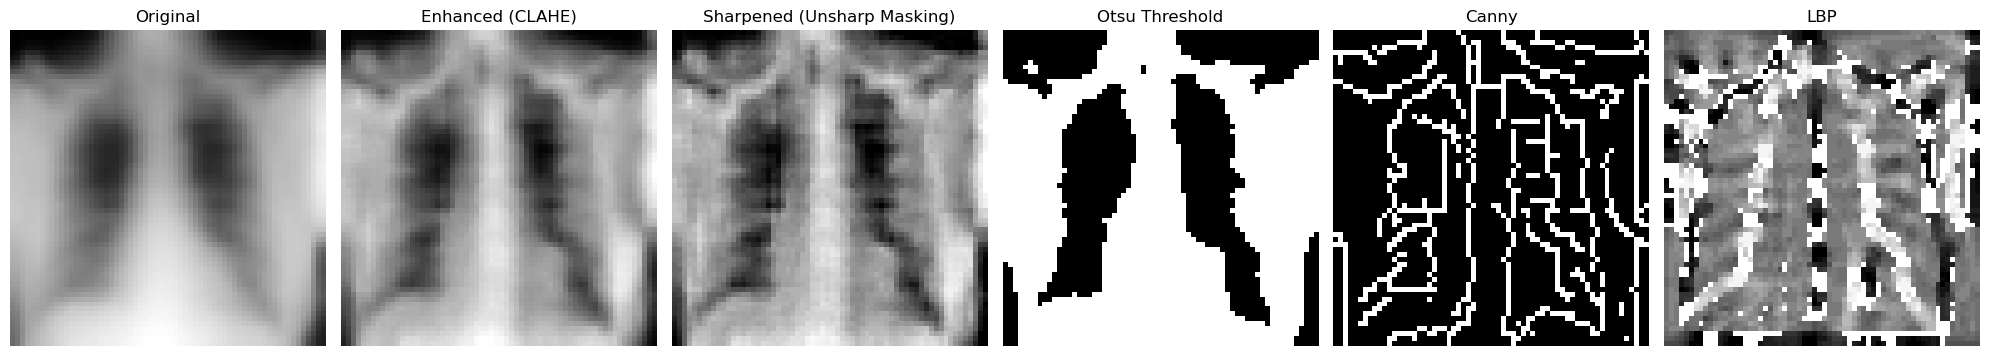

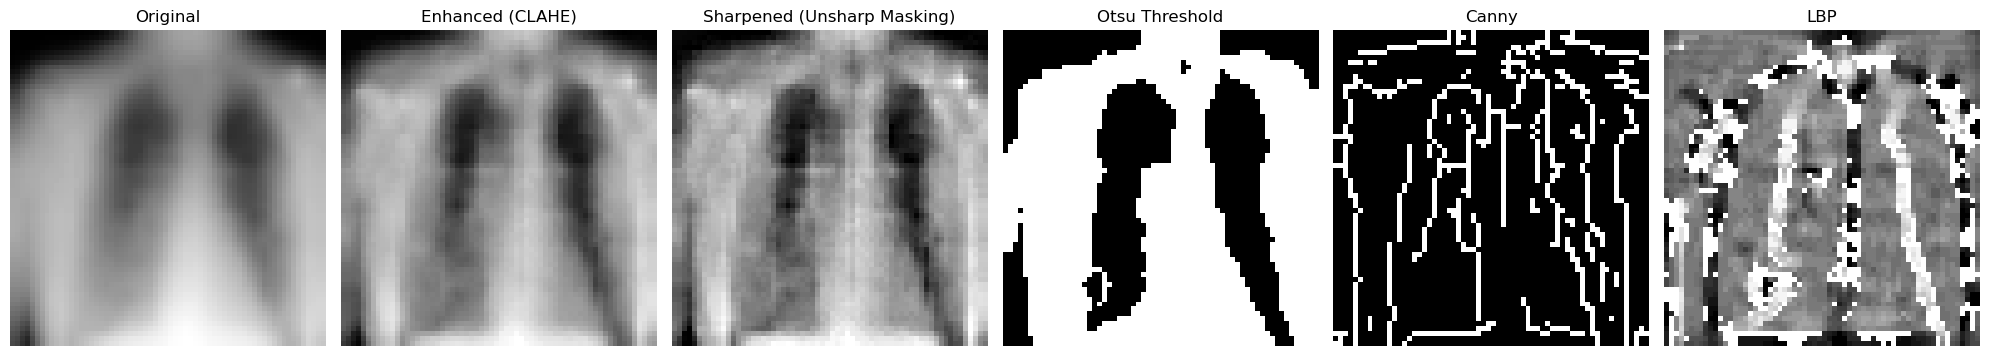

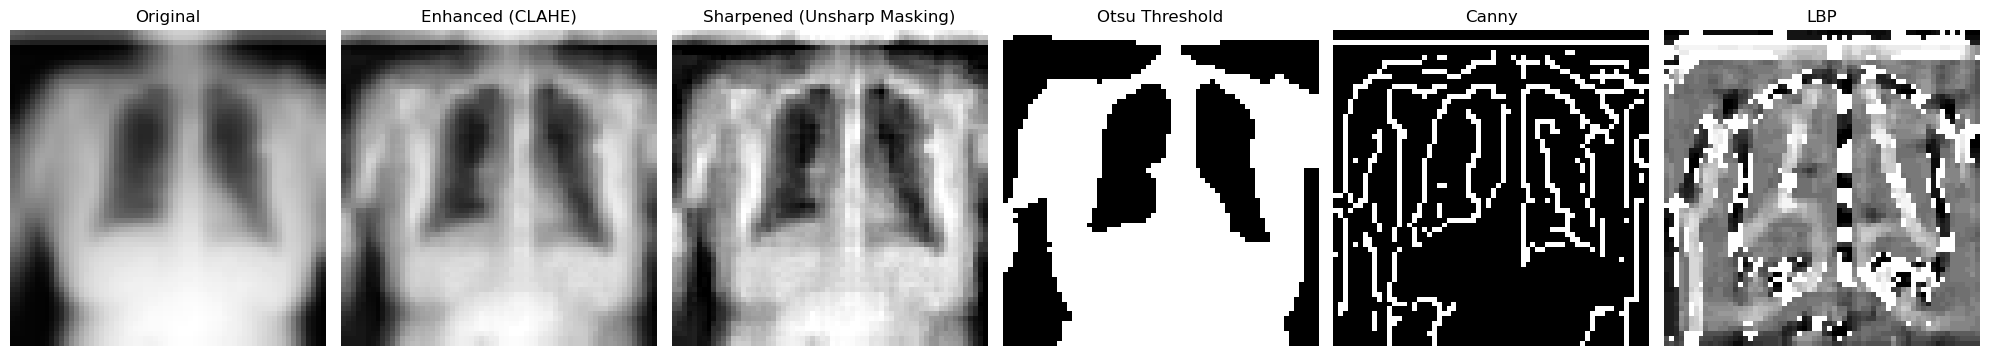

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import ChestMNIST
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern

# Load and transform the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Download and load the ChestMNIST dataset
data = ChestMNIST(split='test', transform=transform, download=True)

# Extract images and labels
images, labels = [], []
for i in range(10):  # Adjust to 50 images for a more comprehensive view
    image, label = data[i]
    images.append(image.numpy())
    labels.append(label)

# Convert images to numpy arrays
images = [image.squeeze() for image in images]

# Function to process images
def process_image(image):
    # Convert image to 8-bit grayscale
    image = (image * 255).astype(np.uint8)  
    
    # Enhancement using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)

    # Enhancement using Unsharp Masking
    blurred_image = cv2.GaussianBlur(enhanced_image, (7, 7), sigmaX=1.5)
    sharpened_image = cv2.addWeighted(enhanced_image, 2.5, blurred_image, -1.5, 0)

    # Segmentation using Otsu's Thresholding
    _, otsu_thresholded_image = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Improved Segmentation using Canny filter with tighter thresholds
    canny_image = cv2.Canny(enhanced_image, 150, 50)

    # Improved Feature Extraction using LBP
    radius = 3
    n_points = 8 * radius
    lbp_image = local_binary_pattern(enhanced_image, n_points, radius, method='uniform')

    return image, enhanced_image, sharpened_image, otsu_thresholded_image, canny_image, lbp_image

# Titles for the different processed images
titles = ["Original", "Enhanced (CLAHE)", "Sharpened (Unsharp Masking)", "Otsu Threshold", "Canny", "LBP"]

# Process and display images
for idx, img in enumerate(images):
    original, enhanced, sharpened, otsu_thresh, canny, lbp = process_image(img)
    
    # Create subplots for each processed image in a single row
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))  # One row, six columns
    
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis('off')
    
    axes[1].imshow(enhanced, cmap='gray')
    axes[1].set_title("Enhanced (CLAHE)")
    axes[1].axis('off')
    
    axes[2].imshow(sharpened, cmap='gray')
    axes[2].set_title("Sharpened (Unsharp Masking)")
    axes[2].axis('off')
    
    axes[3].imshow(otsu_thresh, cmap='gray')
    axes[3].set_title("Otsu Threshold")
    axes[3].axis('off')
    
    axes[4].imshow(canny, cmap='gray')
    axes[4].set_title("Canny")
    axes[4].axis('off')
    
    axes[5].imshow(lbp, cmap='gray')
    axes[5].set_title("LBP")
    axes[5].axis('off')
    
    plt.tight_layout()
    plt.show()


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from medmnist import BloodMNIST
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern

# Create a PDF file to save the output images
output_pdf = "processed_images.pdf"
pdf = PdfPages(output_pdf)

# Load and transform the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

data = BloodMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].numpy(), data[i][1]) for i in range(50)])  

def process_image(image):
    image = (image * 255).astype(np.uint8)  
    image = np.transpose(image, (1, 2, 0)) 
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)

    blurred_image = cv2.GaussianBlur(enhanced_image, (7, 7), sigmaX=1.5)
    blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2RGB)
    
    # Edge Detection using Sobel filter
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)  # Combine gradients
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    
    # Edge Detection using Canny filter with tuned thresholds
    canny = cv2.Canny(blurred_image, 50, 150)
    
    # Segmentation using Otsu's Thresholding
    _, otsu_thresholded_image = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    smoothed = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=0)
    
    # Feature Extraction using Local Binary Patterns (LBP)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    
    # Image Sharpening using Unsharp Masking (enhanced sharpening)
    sharpness = cv2.addWeighted(image, 3.0, blurred_image_rgb, -2.0, 0)
    
    return image, sobel_combined, canny, otsu_thresholded_image, smoothed, lbp, sharpness

# Process and save images
for idx, img in enumerate(images):
    original, sobel, canny, otsu_thresh, smoothed, lbp, sharpness = process_image(img)
    
    # Create a figure for each image and its processed versions
    fig, axes = plt.subplots(1, 7, figsize=(20, 5))  
    titles = ["Original", "Sobel", "Canny", "Otsu Threshold", "Smoothed", "LBP", "Sharpened"]
    images_set = [original, sobel, canny, otsu_thresh, smoothed, lbp, sharpness]
    
    for ax, title, img in zip(axes, titles, images_set):
        if title == "Original" or title == "Sharpened":
            ax.imshow(img)
        else:
            ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    
    # Add the figure to the PDF
    pdf.savefig(fig)
    plt.close(fig)

# Close the PDF
pdf.close()

print(f"Processing and saving completed. Check the file '{output_pdf}' for results.")


Using downloaded and verified file: C:\Users\kavit\.medmnist\bloodmnist.npz
Processing and saving completed. Check the file 'processed_images.pdf' for results.


Using downloaded and verified file: C:\Users\kavit\.medmnist\bloodmnist.npz


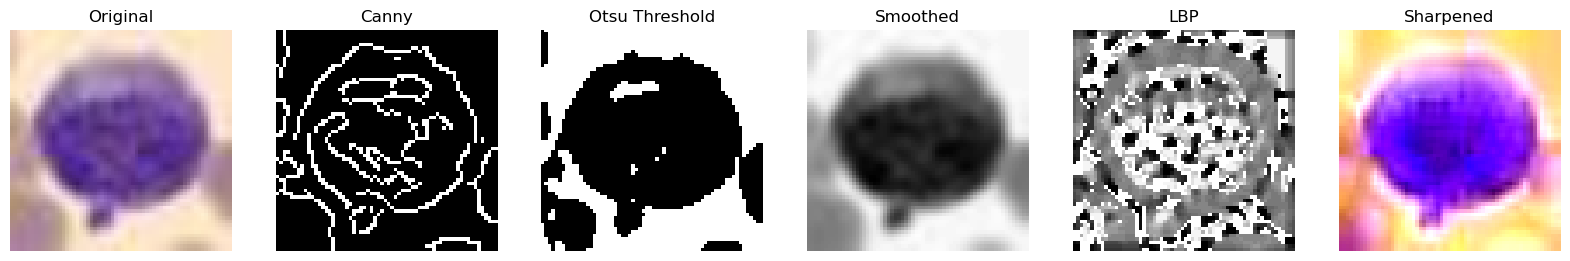

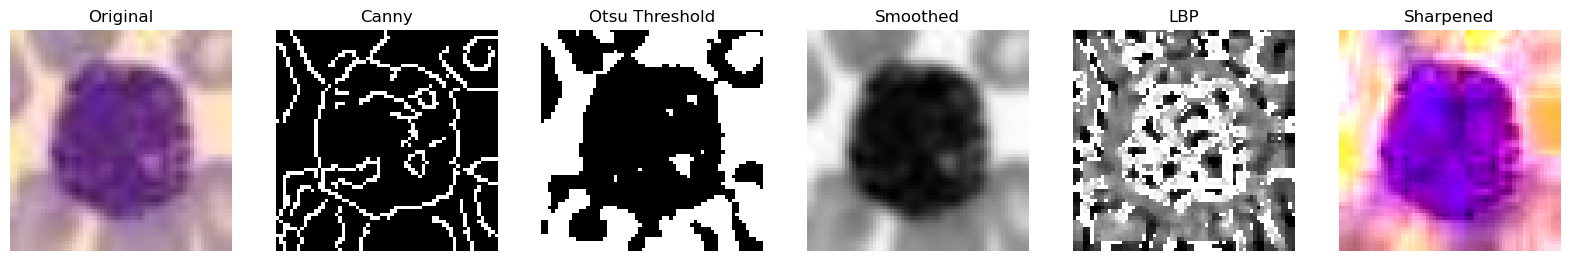

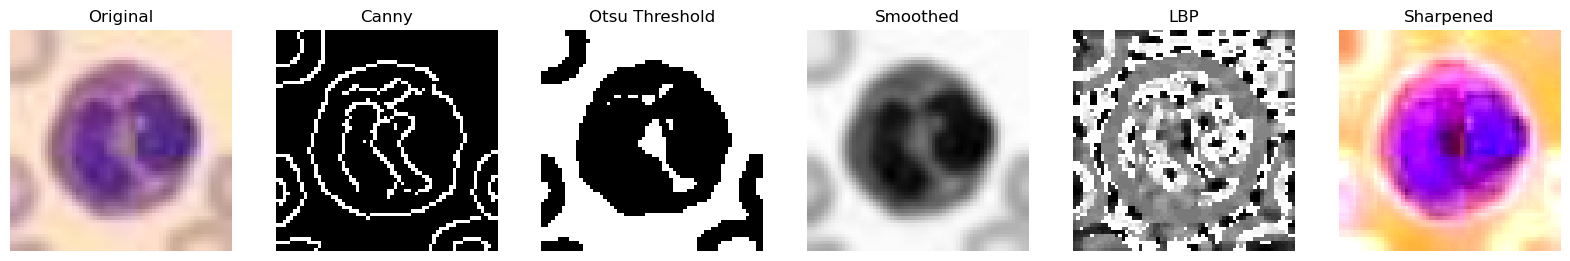

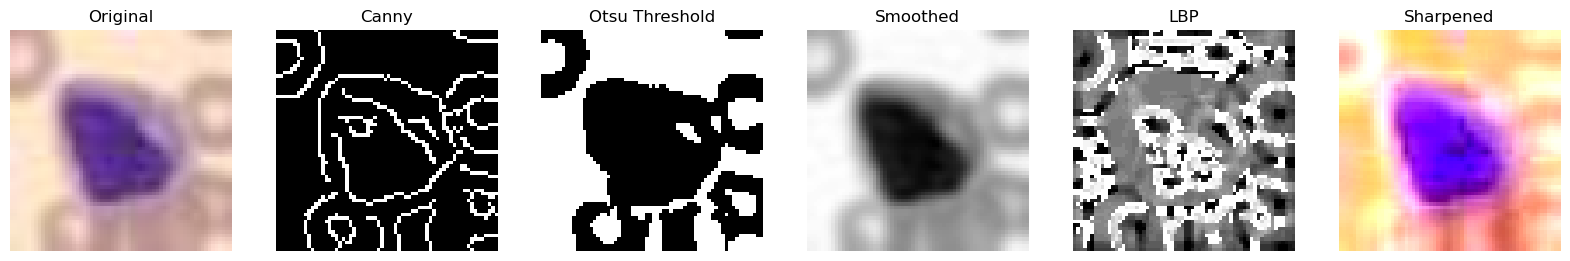

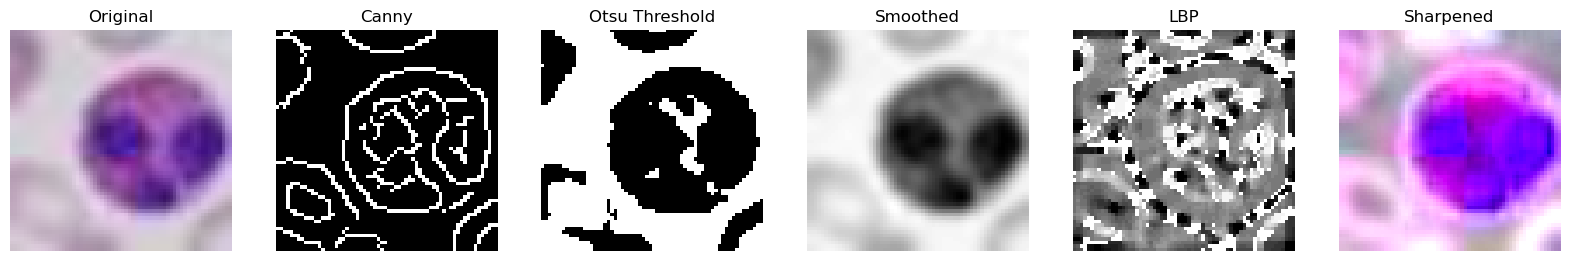

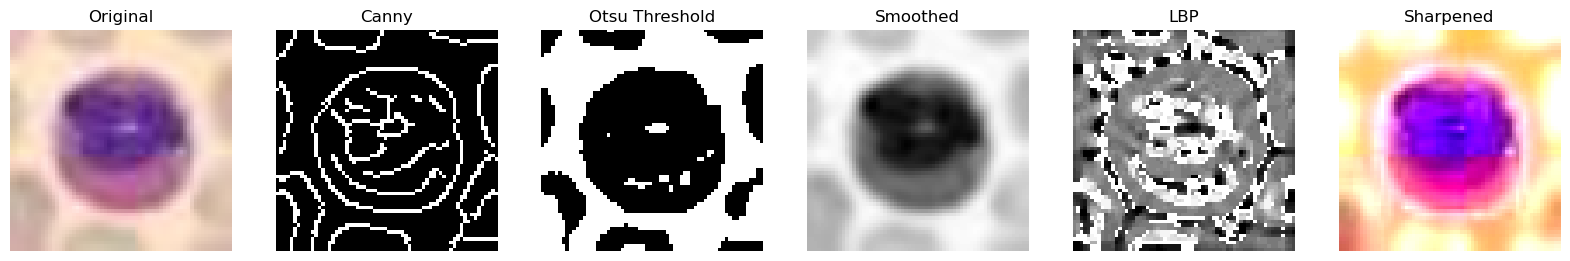

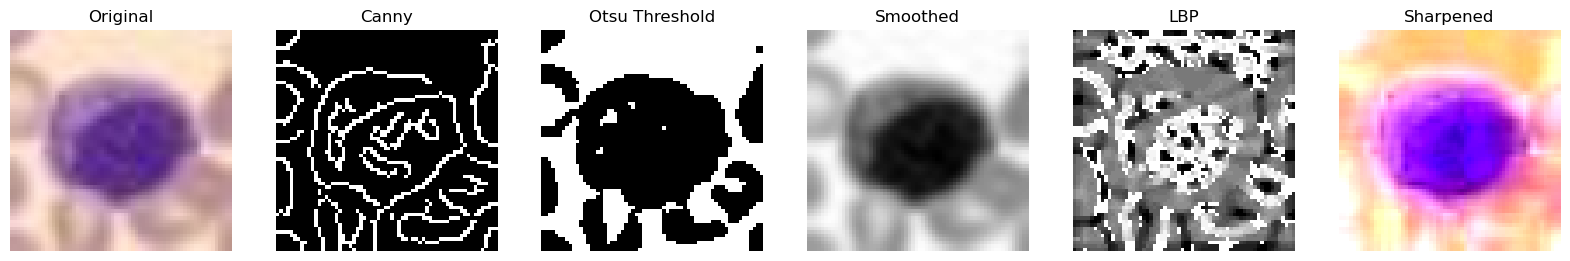

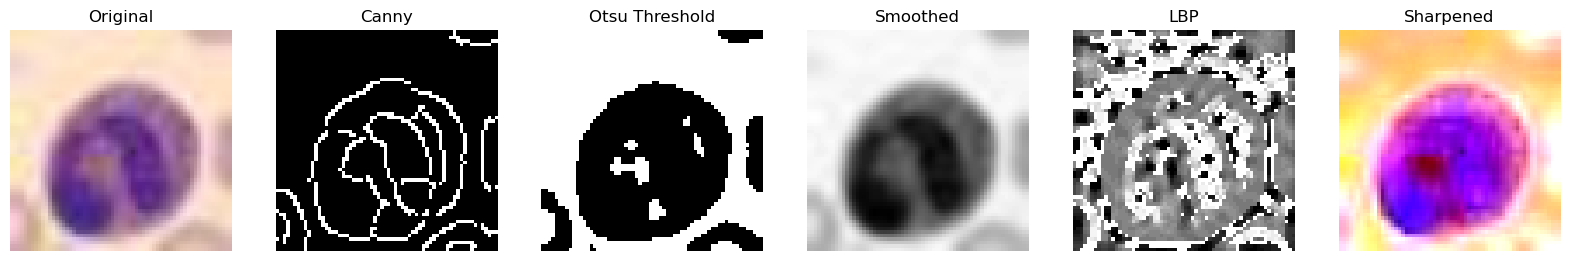

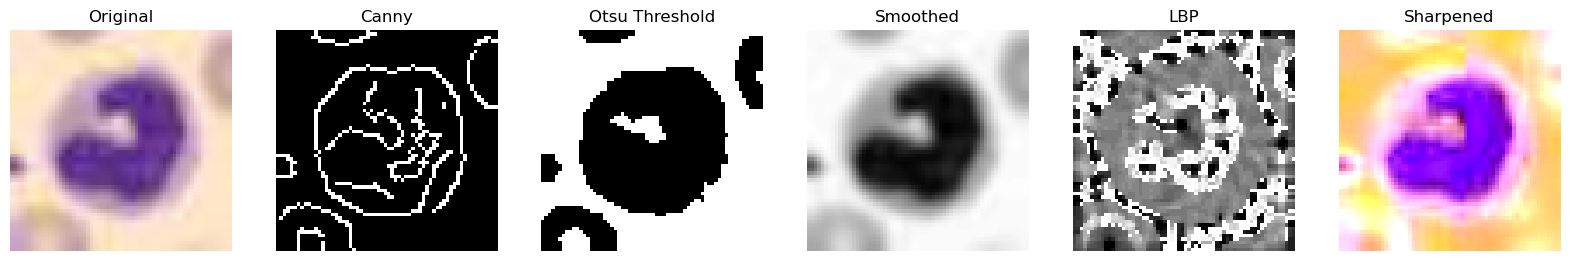

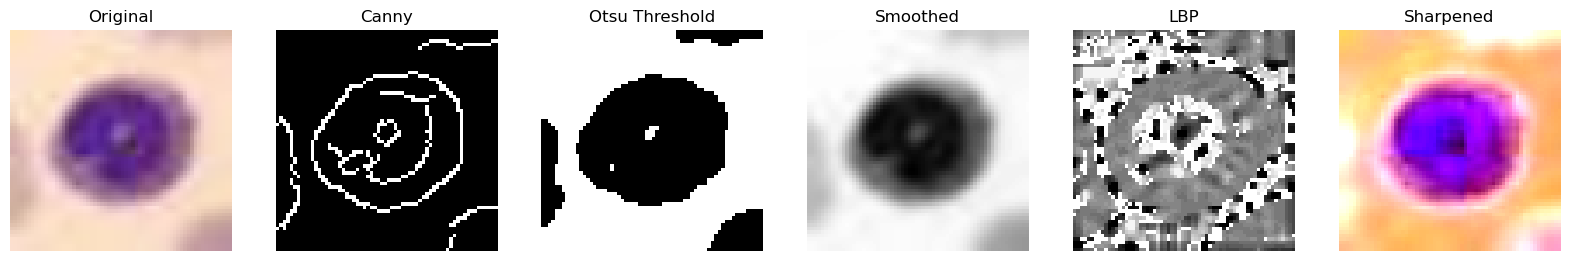

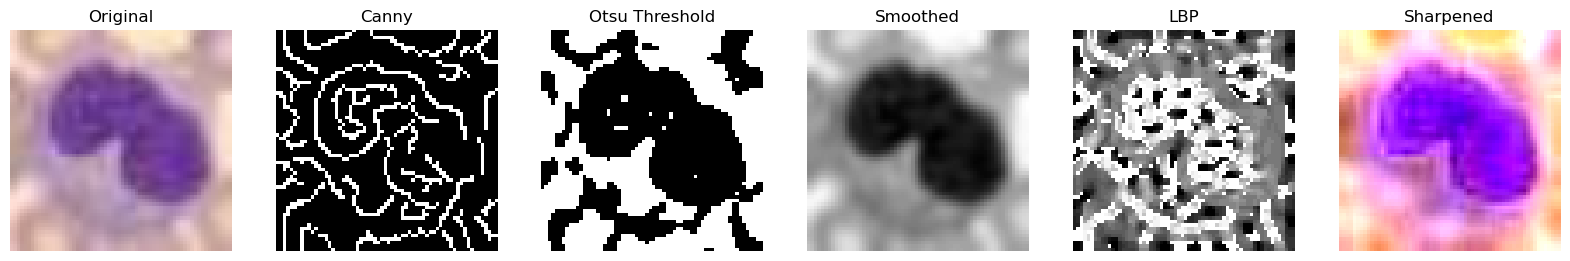

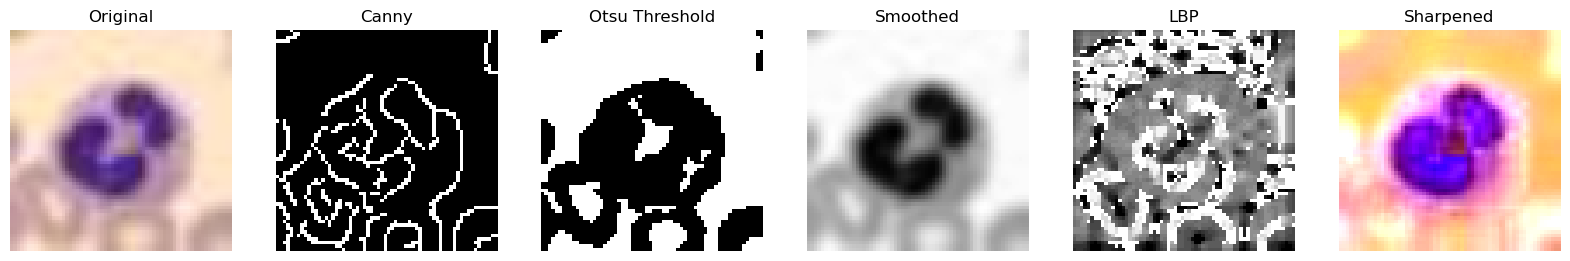

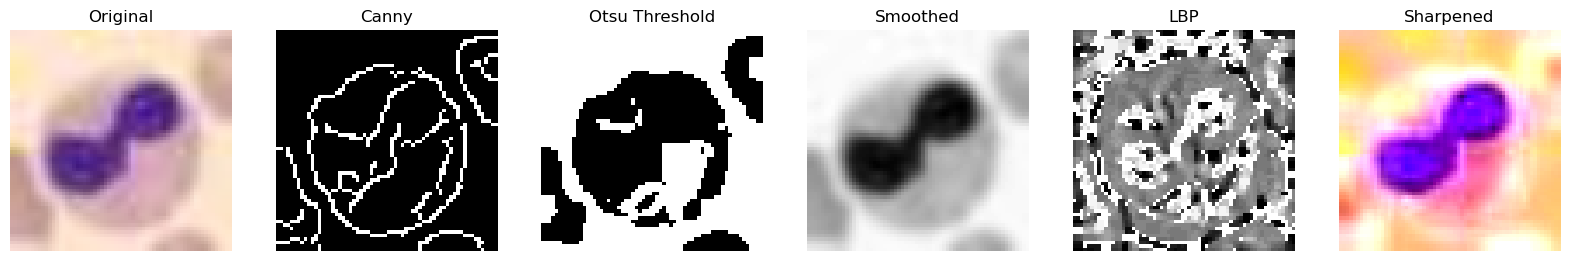

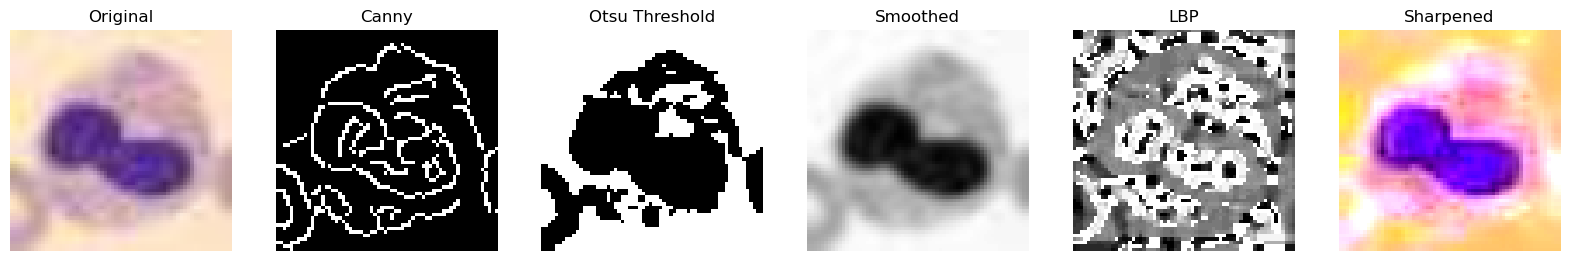

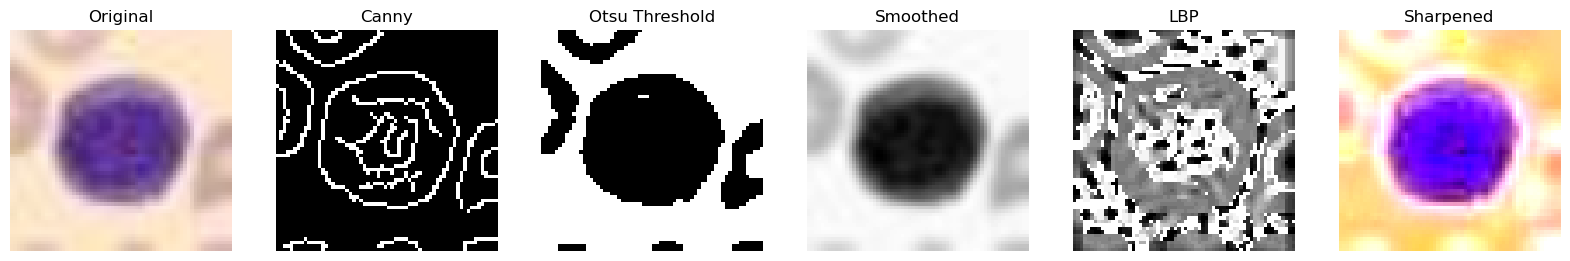

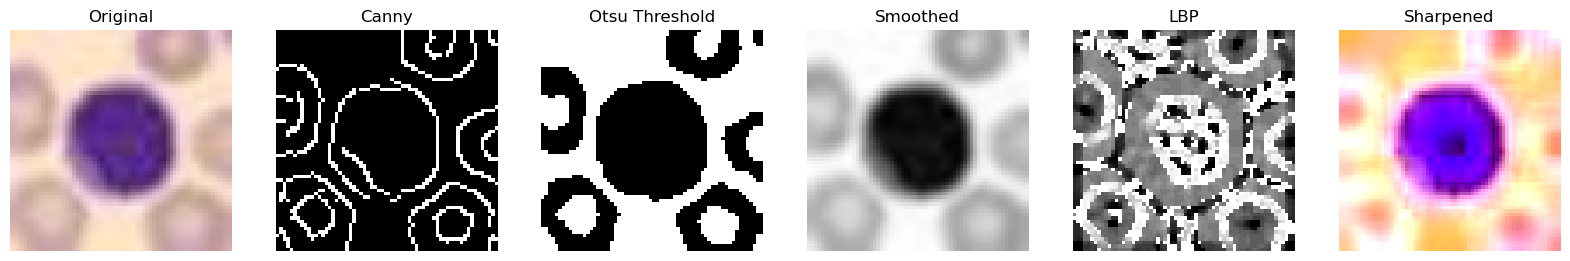

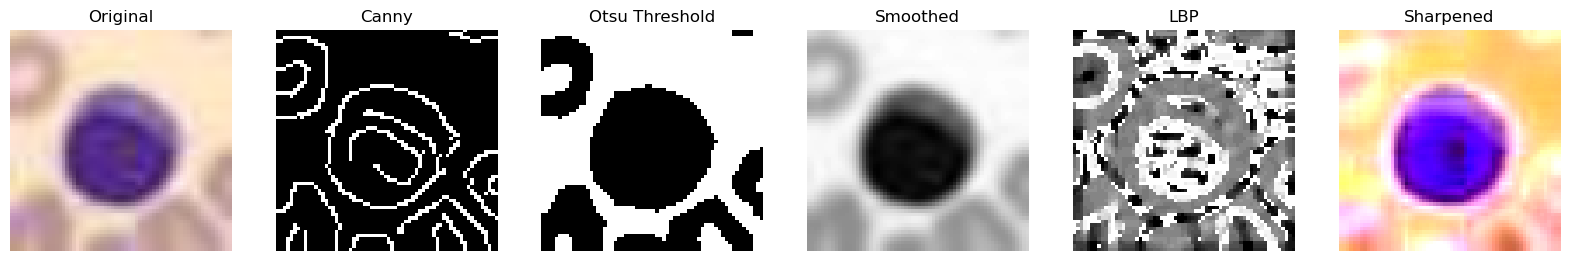

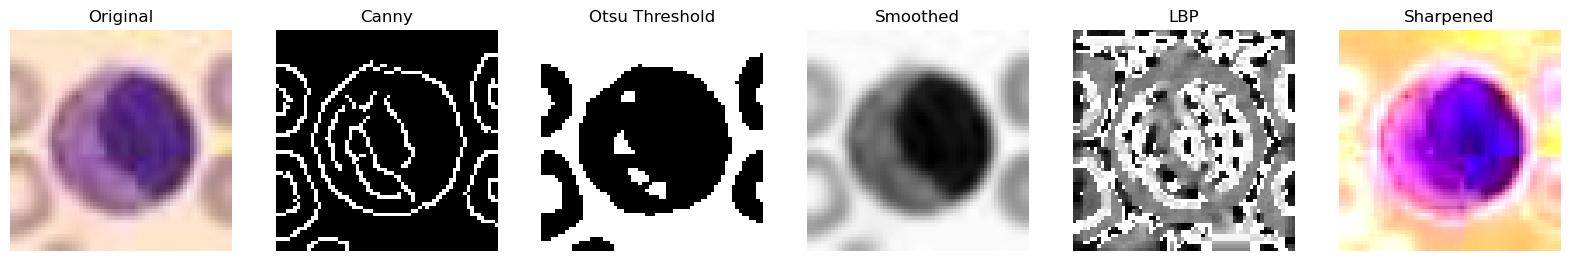

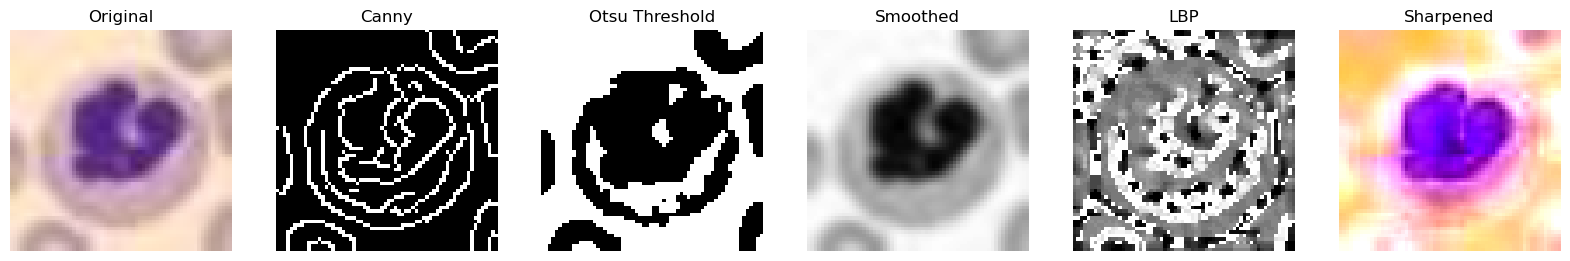

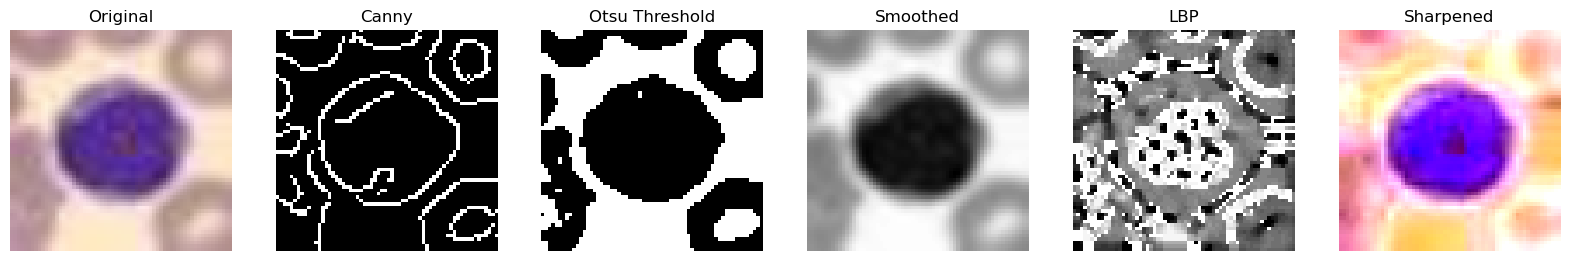

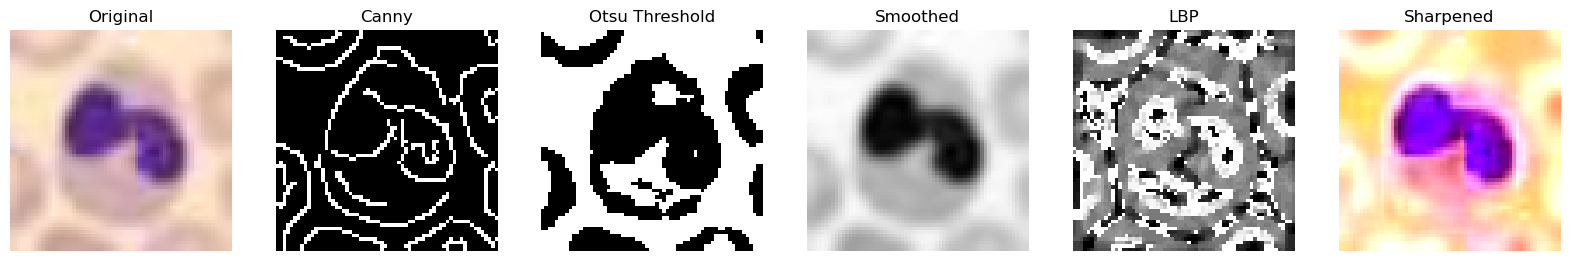

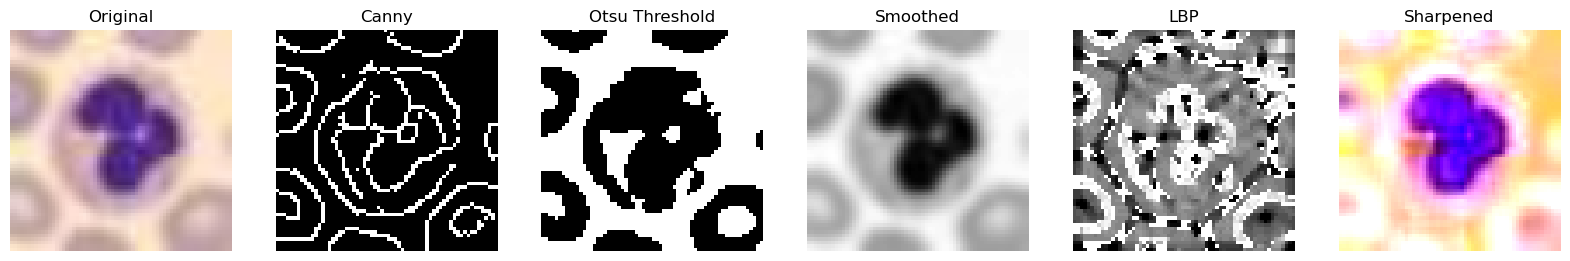

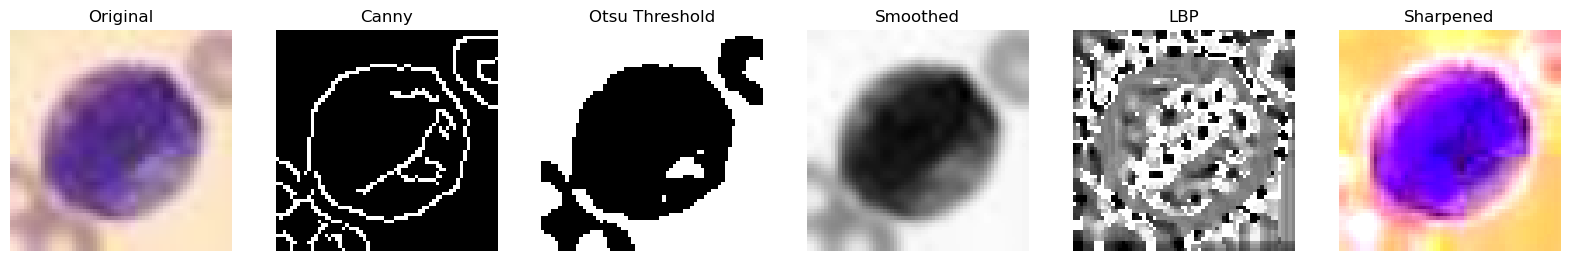

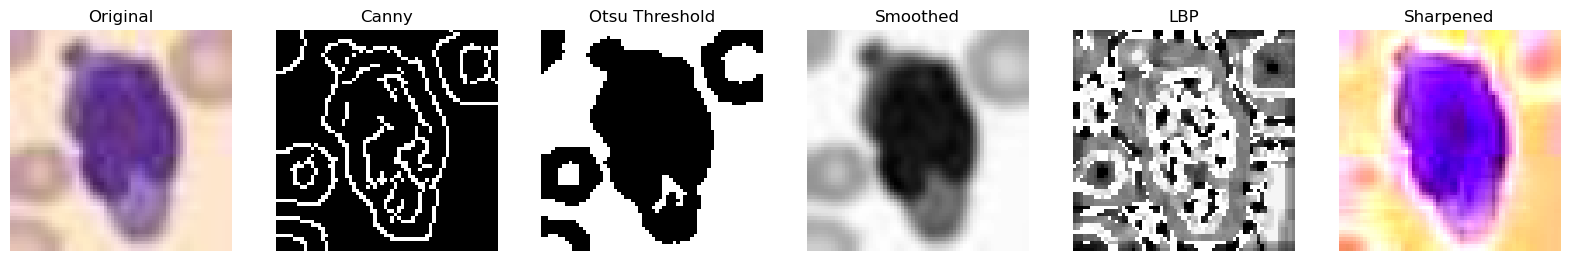

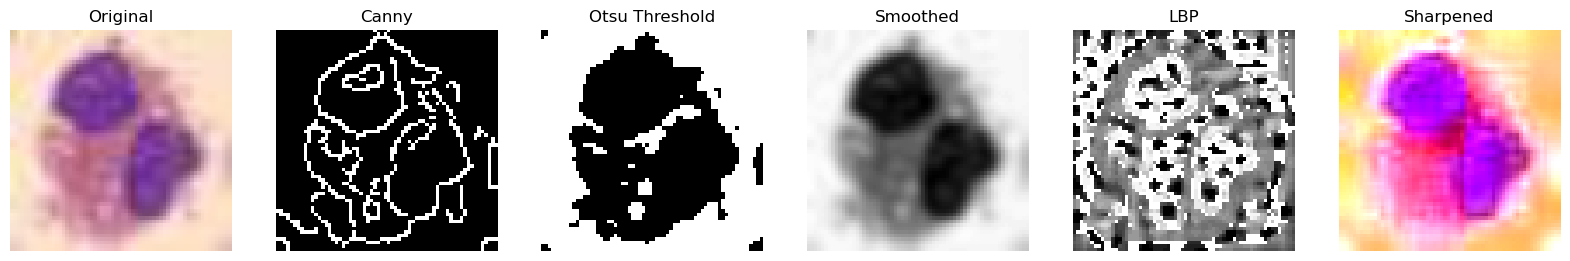

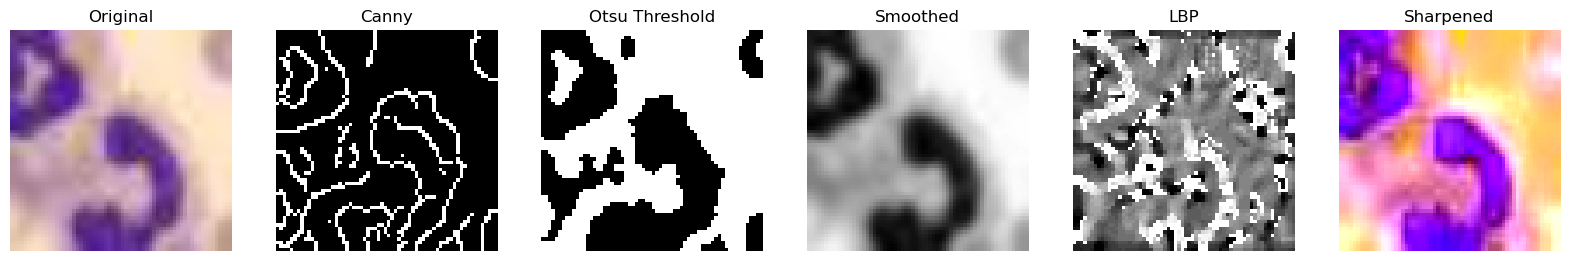

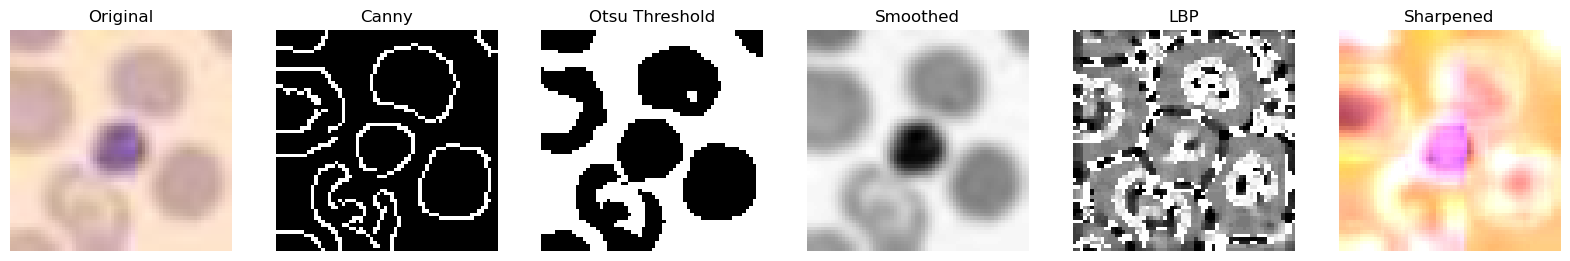

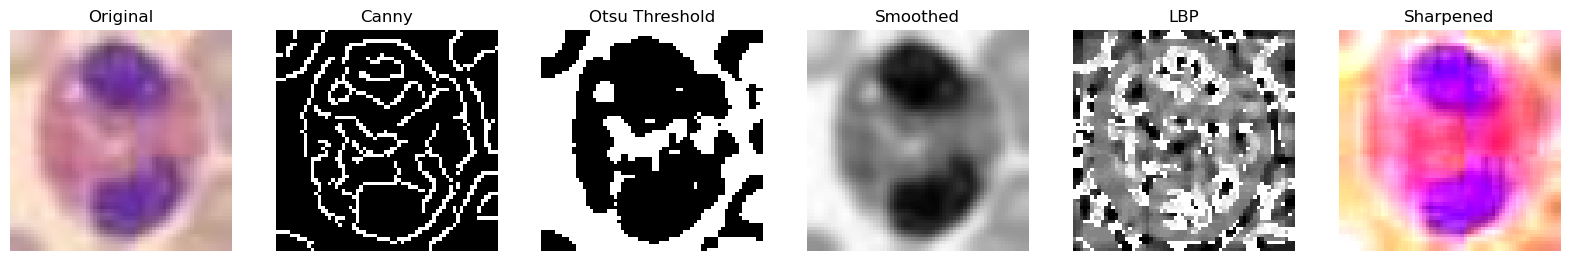

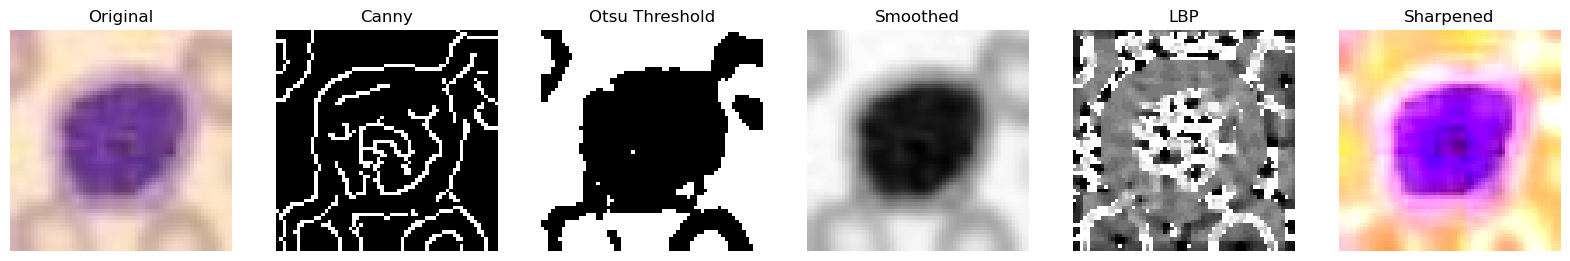

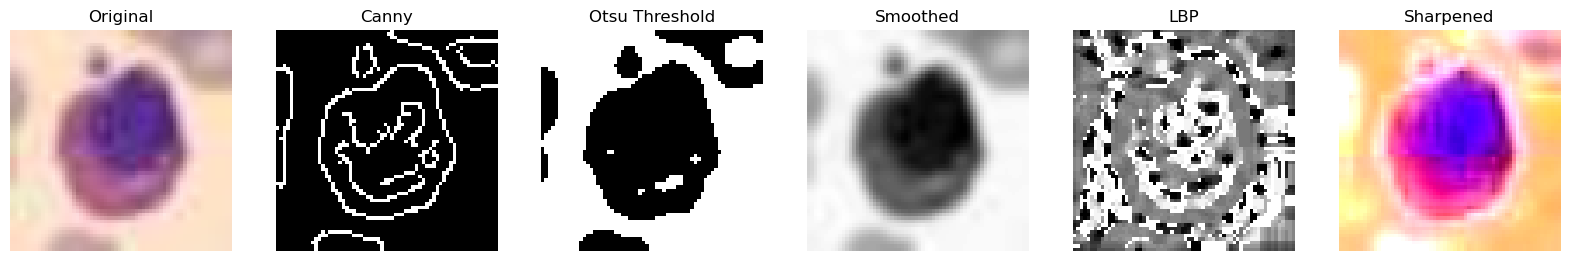

All images are completed.


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import BloodMNIST
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

data = BloodMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].numpy(), data[i][1]) for i in range(30)])

def process_image(image):
    image = (image * 255).astype(np.uint8)
    image = np.transpose(image, (1, 2, 0))
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)
    blurred_image = cv2.GaussianBlur(enhanced_image, (7, 7), sigmaX=1.5)
    blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2RGB)
    canny = cv2.Canny(blurred_image, 50, 150)
    _, otsu_thresholded_image = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    smoothed = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=0)
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    sharpness = cv2.addWeighted(image, 3.0, blurred_image_rgb, -2.0, 0)
    
    return image, canny, otsu_thresholded_image, smoothed, lbp, sharpness

for idx, img in enumerate(images):
    original, canny, otsu_thresh, smoothed, lbp, sharpness = process_image(img)
    
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    titles = ["Original", "Canny", "Otsu Threshold", "Smoothed", "LBP", "Sharpened"]
    images_set = [original, canny, otsu_thresh, smoothed, lbp, sharpness]
    
    for ax, title, img in zip(axes, titles, images_set):
        if title == "Original" or title == "Sharpened":
            ax.imshow(img)
        else:
            ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    
    plt.show()
    plt.close(fig)

print("All images are completed.")


Using downloaded and verified file: C:\Users\kavit\.medmnist\bloodmnist.npz


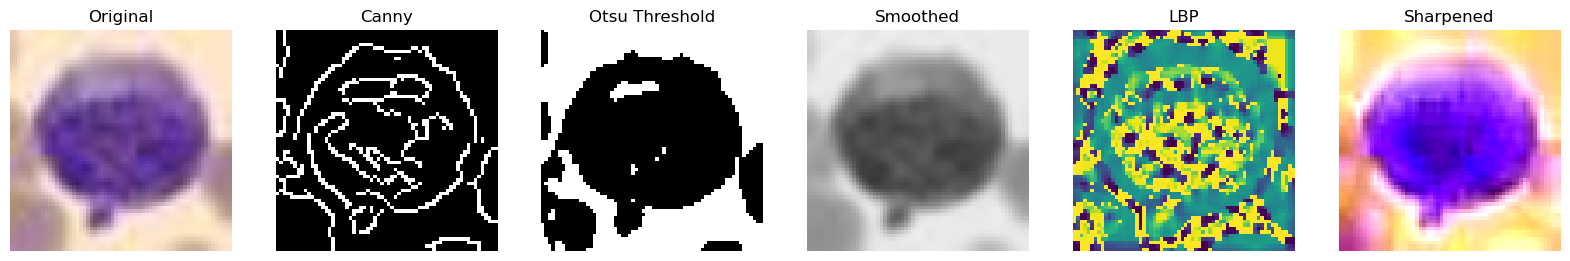

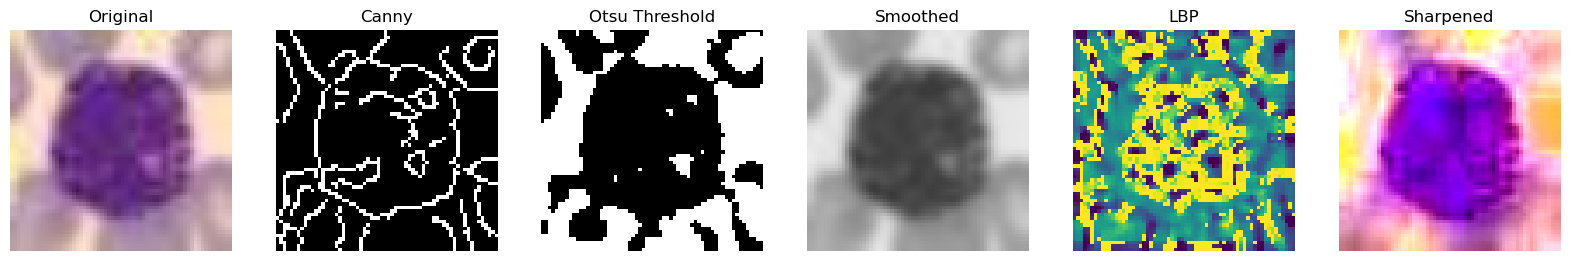

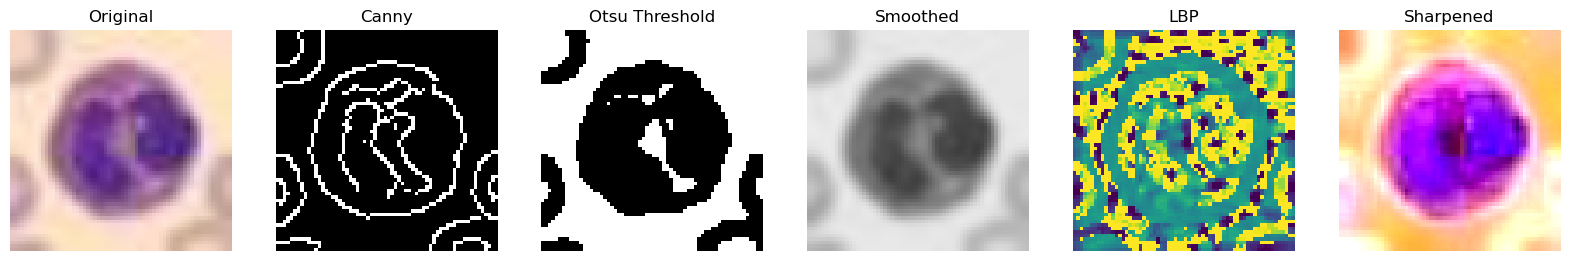

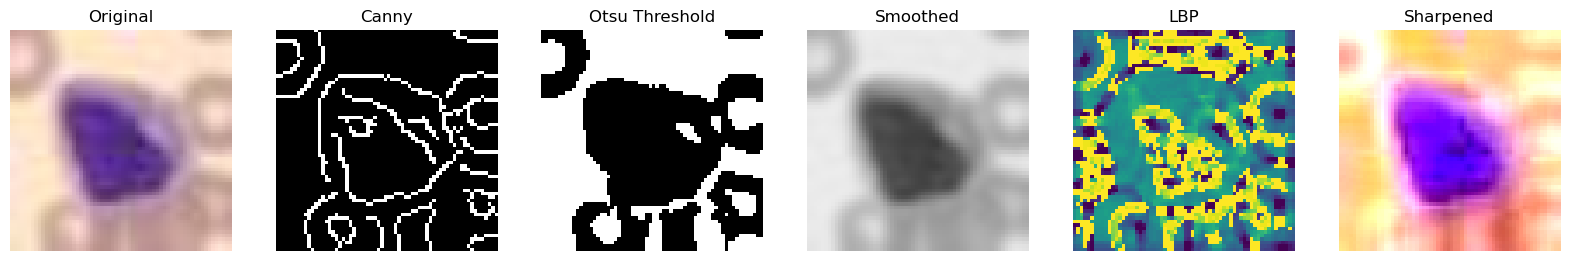

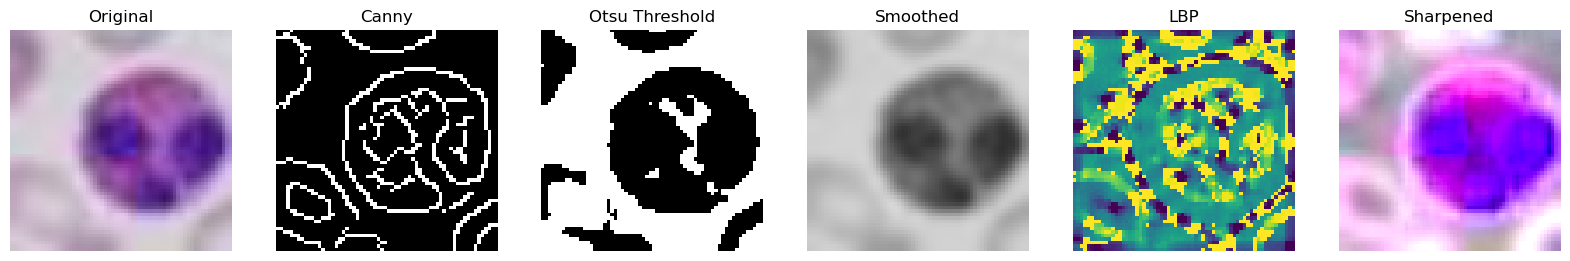

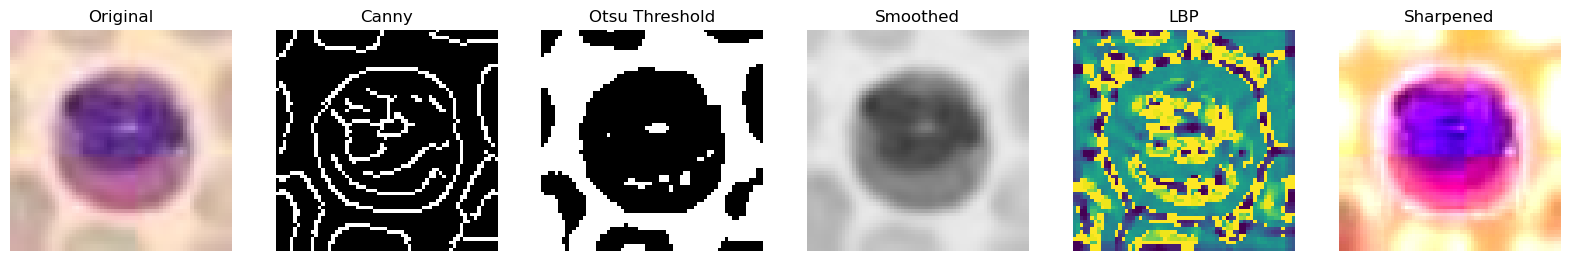

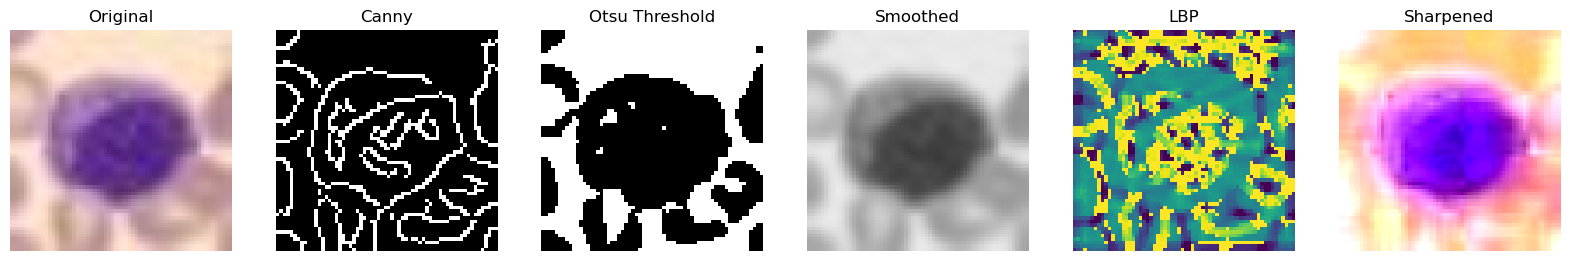

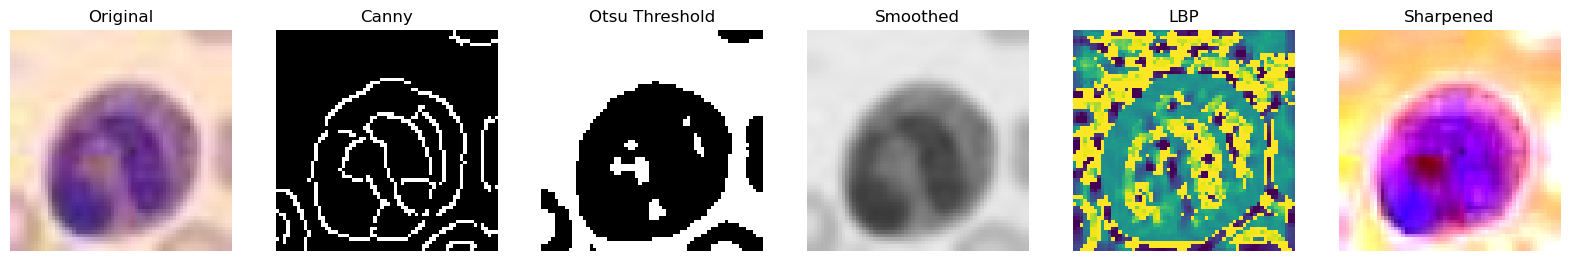

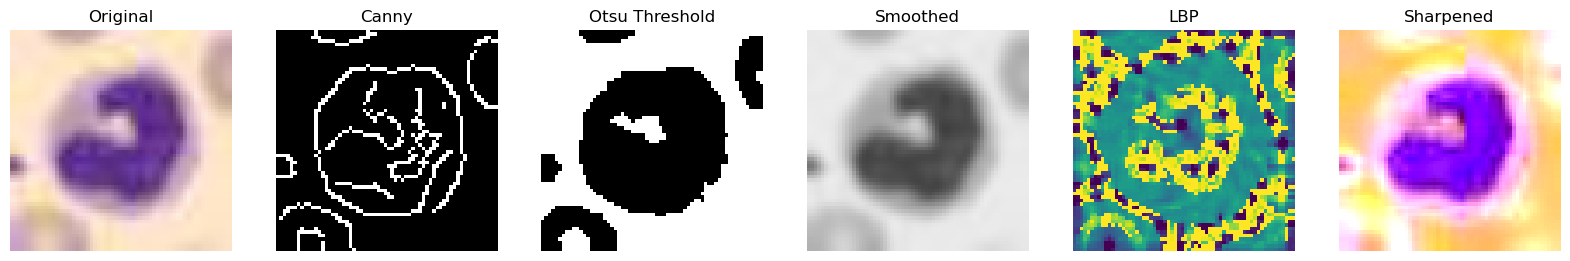

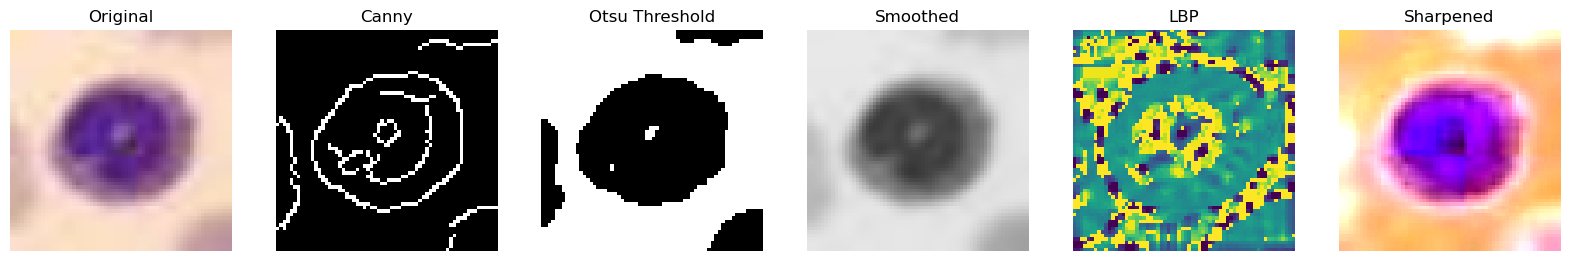

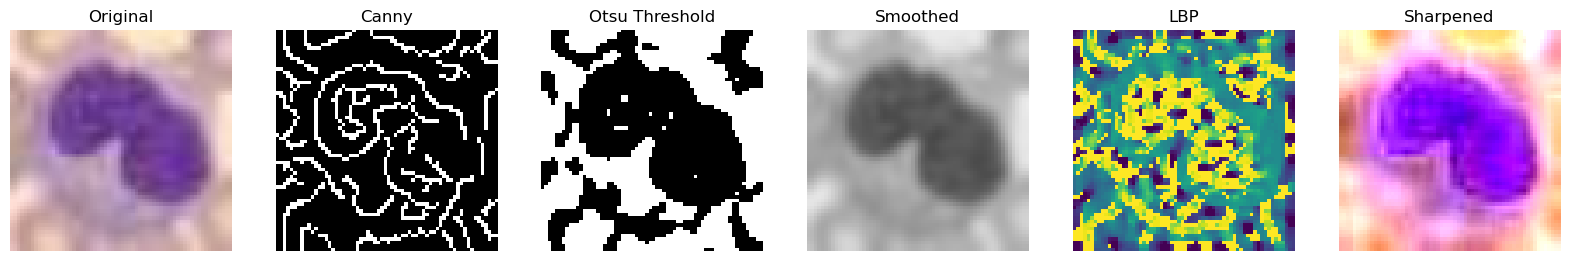

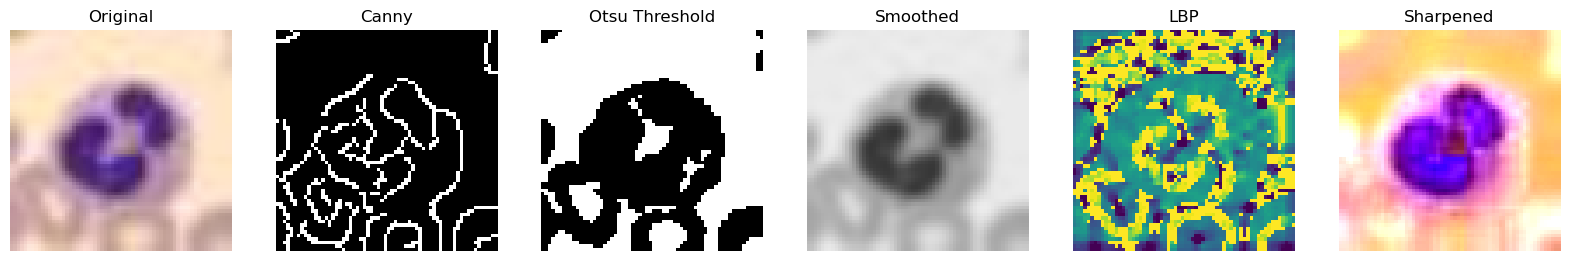

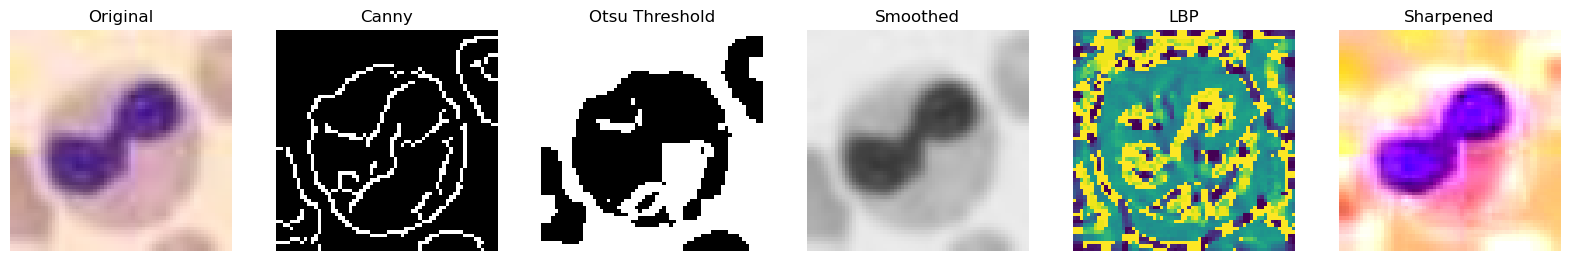

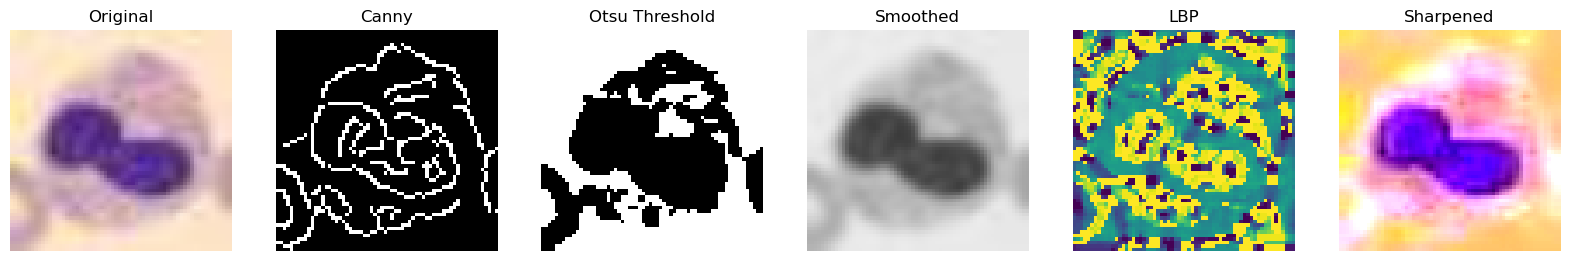

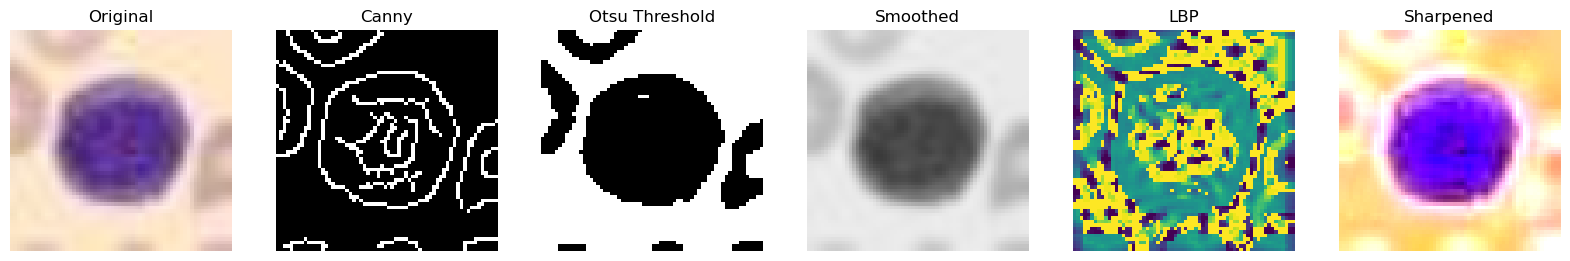

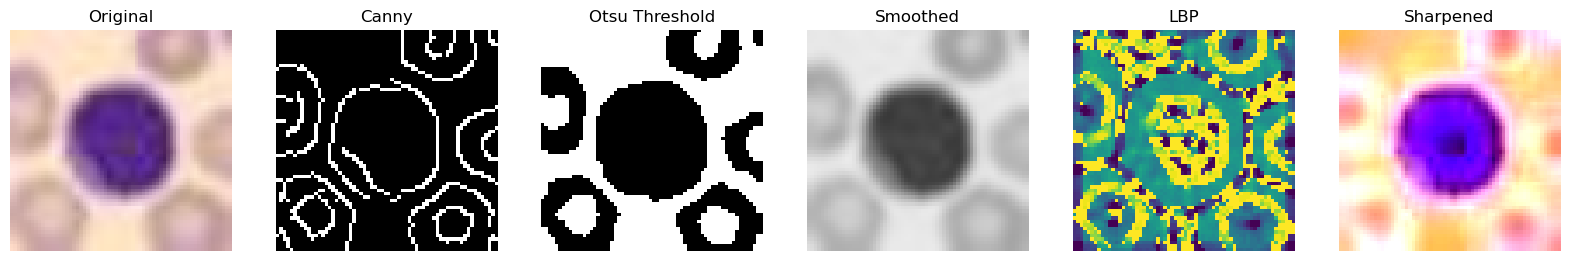

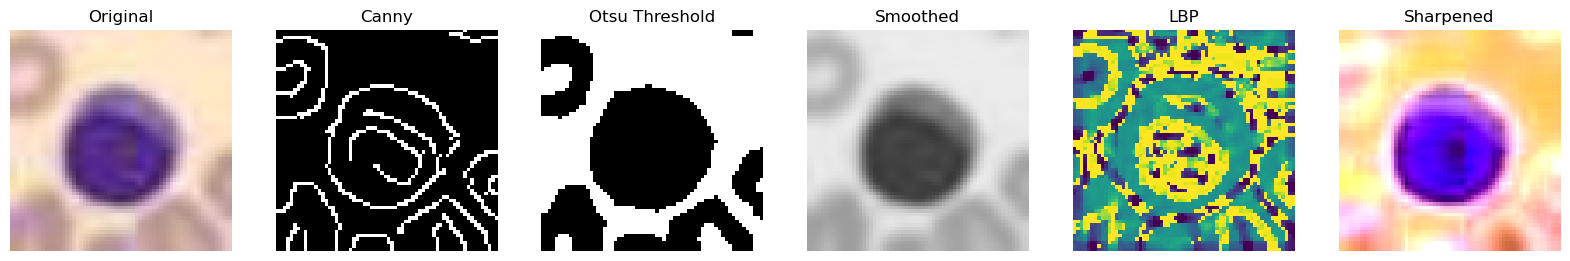

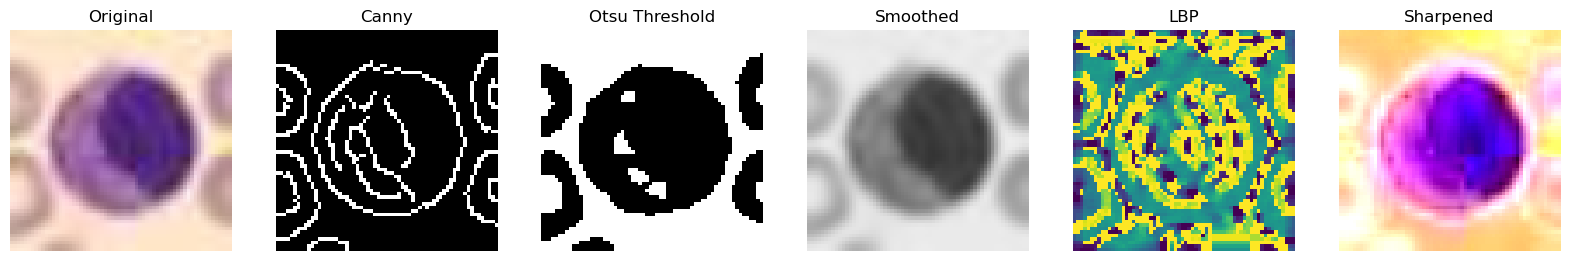

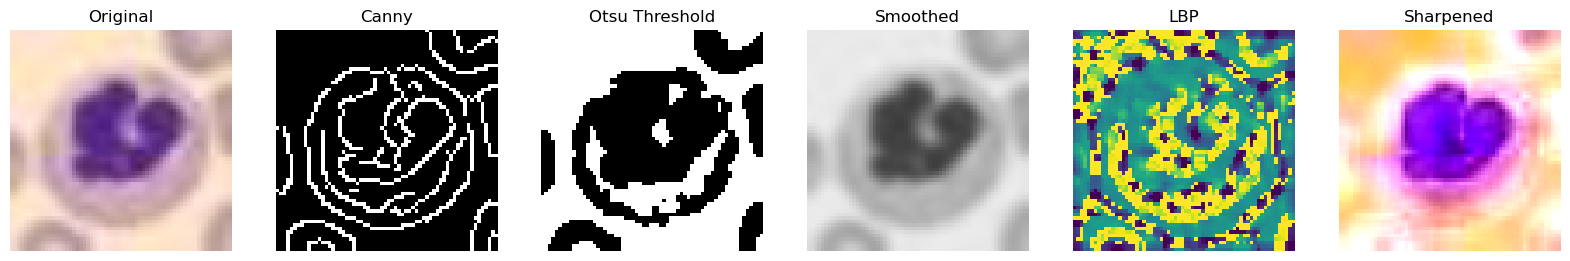

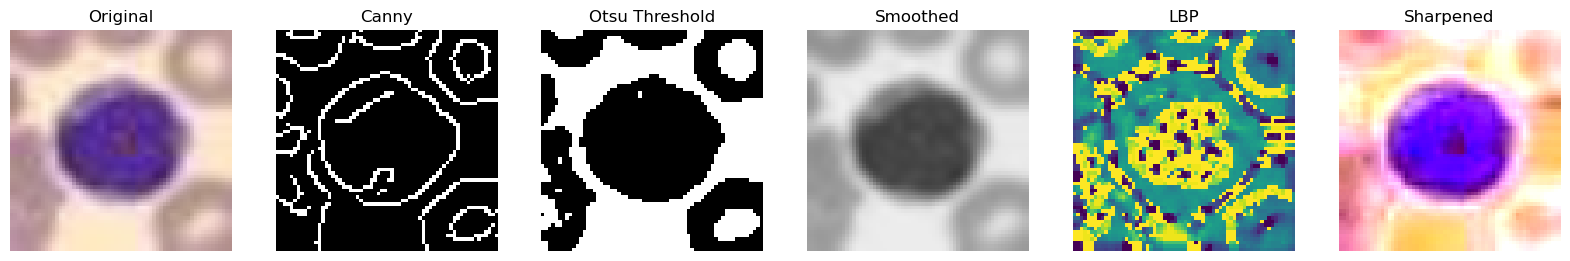

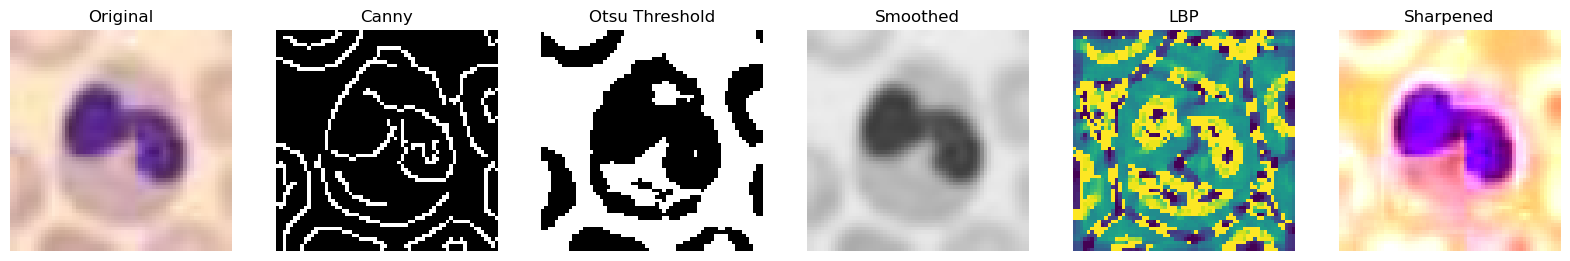

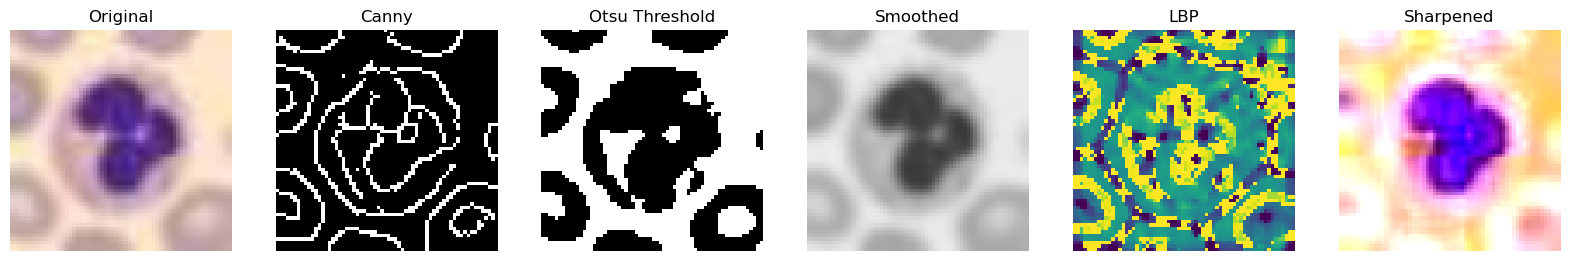

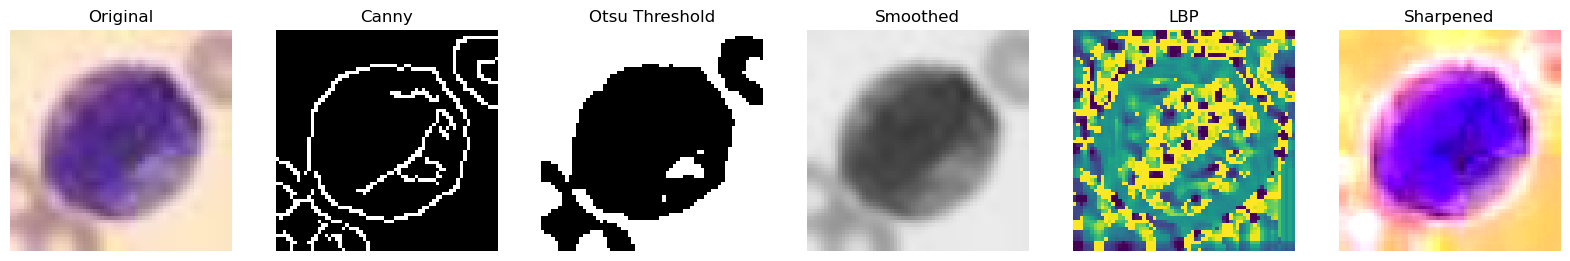

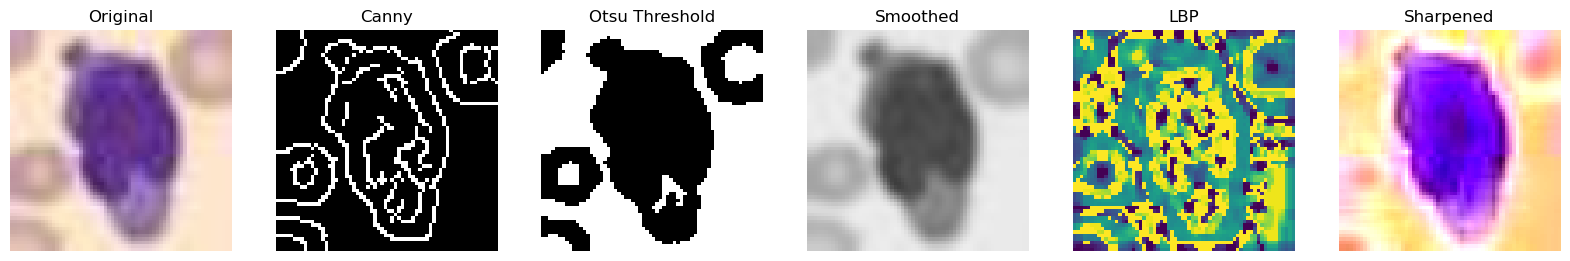

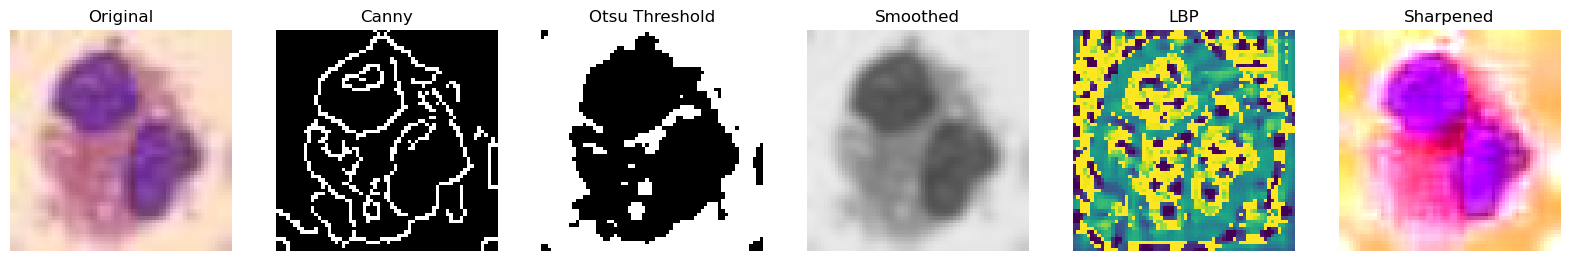

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import BloodMNIST
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern

# Load and preprocess the BloodMNIST dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor()         
])

data = BloodMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].numpy(), data[i][1]) for i in range(30)])

def process_image(image):
    image = (image * 255).astype(np.uint8)  
    image = np.transpose(image, (1, 2, 0))  
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Image Enhancement: CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(enhanced_image, (7, 7), sigmaX=1.5)
    blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2RGB)
    
    # Edge detection using Canny
    canny = cv2.Canny(blurred_image, 50, 150)

    # Otsu's Thresholding for segmentation
    _, otsu_thresholded_image = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Smoothing the image 
    smoothed = cv2.GaussianBlur(gray_image, (5, 5), sigmaX=0)
    smoothed_rgb = cv2.cvtColor(smoothed, cv2.COLOR_GRAY2RGB)

    # Feature extraction using Local Binary Pattern (LBP)
    radius = 3
    n_points = 16 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

    lbp = np.uint8(lbp * (255.0 / lbp.max()))
    
    # unsharp masking
    sharpness = cv2.addWeighted(image, 3.0, blurred_image_rgb, -2.0, 0)
    enhanced_image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2RGB)
    
    return image, canny, otsu_thresholded_image, smoothed_rgb, lbp, sharpness

for idx, img in enumerate(images):
    original, canny, otsu_thresh, smoothed, lbp, sharpness = process_image(img)
    
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))  
    titles = ["Original", "Canny", "Otsu Threshold", "Smoothed", "LBP", "Sharpened"]
    images_set = [original, canny, otsu_thresh, smoothed, lbp, sharpness]
    
    for ax, title, img in zip(axes, titles, images_set):
        if title == "Canny" or title == "Otsu Threshold":
            ax.imshow(img, cmap='gray')  
        else:
            ax.imshow(img)  
        ax.set_title(title)
        ax.axis('off')
    
    # Display the images and close the figure
    plt.show()
    plt.close(fig)

print("All images processed and displayed.")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from medmnist import BloodMNIST
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern

# Load and preprocess the BloodMNIST dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),  
    transforms.ToTensor()         
])

data = BloodMNIST(split='test', transform=transform, download=True)
images, labels = zip(*[(data[i][0].numpy(), data[i][1]) for i in range(30)])

def process_image(image):
    image = (image * 255).astype(np.uint8)  
    image = np.transpose(image, (1, 2, 0))  

    # Convert to grayscale for CLAHE and other processing steps
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)  

    # Apply Gaussian blur for sharpening
    blurred_image = cv2.GaussianBlur(enhanced_image, (7, 7), sigmaX=1.5)
    blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_GRAY2RGB)

    # Edge detection using Canny
    canny = cv2.Canny(blurred_image, 50, 150)

    # Otsu's Thresholding for segmentation
    _, otsu_thresholded_image = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Local Binary Pattern (LBP)
    radius = 3
    n_points = 16 * radius
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    lbp = np.uint8(lbp * (255.0 / lbp.max()))  # Normalize

    # Unsharp masking to enhance sharpness
    sharpness = cv2.addWeighted(image, 3.0, blurred_image_rgb, -2.0, 0)
    enhanced_image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2RGB)

    return image, canny, otsu_thresholded_image, enhanced_image, sharpness, lbp

# Process and display the images
for idx, img in enumerate(images):
    original, canny, otsu_thresh, enhanced, sharpness, lbp = process_image(img)

    fig, axes = plt.subplots(1, 6, figsize=(20, 5))  
    titles = ["Original", "Canny Edge", "Otsu Threshold", "CLAHE", "Sharpened", "LBP"]
    images_set = [original, canny, otsu_thresh, enhanced, sharpness, lbp]

    for ax, title, img in zip(axes, titles, images_set):
        if title in ["Canny Edge", "Otsu Threshold"]:  
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(img)  
        ax.set_title(title)
        ax.axis('off')  

    plt.show()
    plt.close(fig)

print("All images processed and displayed.")


In [ ]:
import medmnist
from medmnist import INFO

# Specify the dataset
data_flag = 'bloodmnist'

# Retrieve dataset information
info = INFO[data_flag]

# Print the number of images in each split
print(f"BloodMNIST Dataset Details:")
print(f"Train images: {info['n_samples']['train']}")
print(f"Validation images: {info['n_samples']['val']}")
print(f"Test images: {info['n_samples']['test']}")
print(f"Total images: {sum(info['n_samples'].values())}")
